In [1]:
master_path ='..\..\Raw_Data\\Analysed microscopy data'

In [2]:
from lib.tools import *

In [3]:
#Load data for Experiment 1
basepath = os.path.join(master_path,'20210215')
basepath = os.path.join(basepath,'pos')
print(basepath)
data2={}
for pos in ['pos0','pos1']:
    exp_path = os.path.join(basepath,pos)
    print(exp_path)
    data2[pos] = pd.read_csv(exp_path+"//track.csv") 
    print('Done')
    
#Load data for Experiment 2
basepath = os.path.join(master_path,'20210308')
basepath = os.path.join(basepath,'pos')
print(basepath)
data={}
for pos in ['pos0','pos1','pos2','pos3','pos4','pos5']:
    exp_path = os.path.join(basepath,pos)
    print(pos)
    data[pos] = pd.read_csv(exp_path+"//track.csv") 
    print('Done')

..\..\Raw_Data\Analysed microscopy data\20210215\pos
..\..\Raw_Data\Analysed microscopy data\20210215\pos\pos0
Done
..\..\Raw_Data\Analysed microscopy data\20210215\pos\pos1
Done
..\..\Raw_Data\Analysed microscopy data\20210308\pos
pos0
Done
pos1
Done
pos2
Done
pos3
Done
pos4
Done
pos5
Done


In [4]:
def rec_micro(data,color = '#f56d18',threshx =150,threshy =150,thresh_c=500,thresh_g=300,t_end = 150,cut =False):
    gk = data.groupby('frame')
    t= np.unique(np.array(data['frame']))
    rec_frac_count = np.zeros((np.size(t[0:t_end+1]), 1),dtype=float)
    cell_count = np.zeros((np.size(t[0:t_end+1]), 1),dtype=float)

    fps =['CFP-DIRECT median','YFP-DIRECT median']
    for jj in range(len(t)):
        if t[jj]<=t_end:
            lk = gk.get_group(t[jj])
            sz_lk = lk.loc[(lk['x'] > threshx)]
            dbf_lk = sz_lk.loc[(sz_lk['y'] > threshy)]
            db_lk = dbf_lk.loc[(dbf_lk[fps[0]] > 300) |(dbf_lk[fps[1]] > 300) ]
            rec_frac_count[jj] = db_lk.loc[(db_lk[fps[1]]>thresh_g)][fps[1]].count()/db_lk[fps[1]].count()
            cell_count[jj]= db_lk['x'].count()
        if jj == cut:
            dist = (db_lk[fps[1]],db_lk[fps[0]])
   
    return(t,rec_frac_count,cell_count,dist)

def mean_std_multipos(gg,min_len):
    
    jjh = []
    for jj in range(len(gg)):
        jjh.append(np.asarray(gg[jj][0:min_len]))
        jjh[jj] = jjh[jj].flatten()
    jjh = np.asarray(jjh)
    
    return (np.mean(jjh, axis =0),np.std(jjh, axis =0))
    

pos0
pos1
pos2
pos3
pos4
pos5
pos0
pos1


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


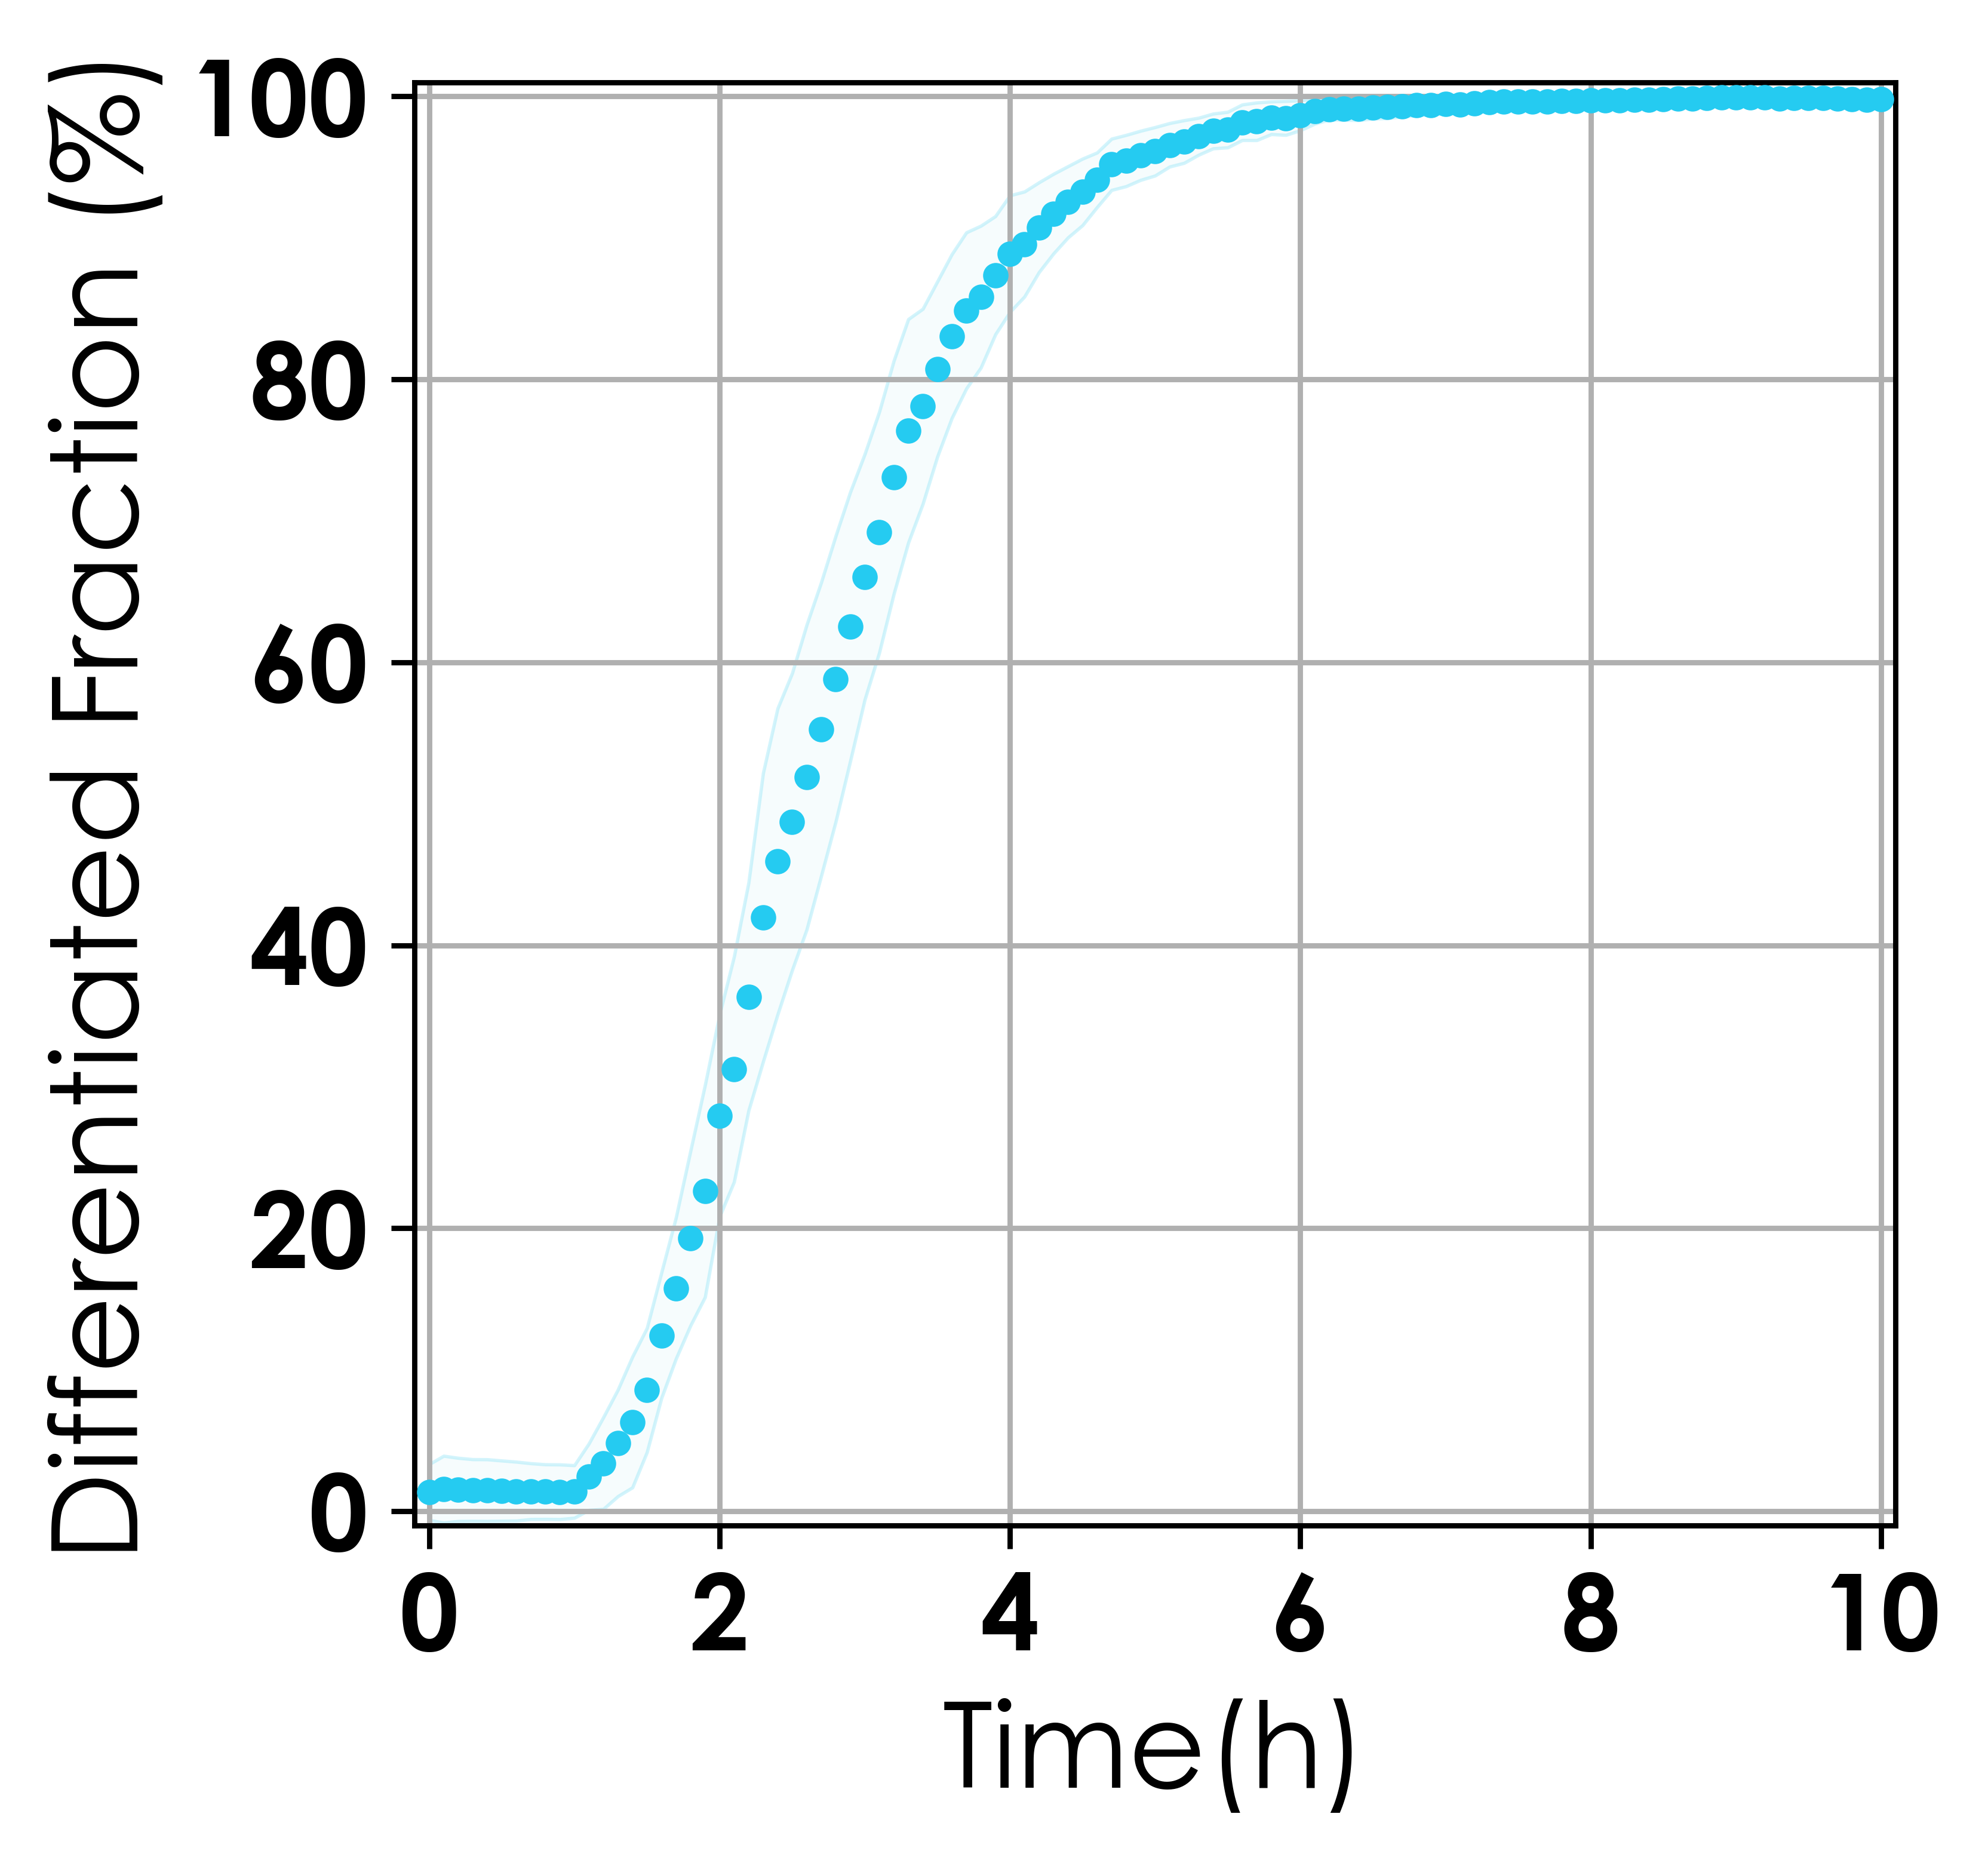

In [5]:
fig, ax1 = plt.subplots(1,1,figsize=(4, 4), dpi=800, facecolor='w', edgecolor='k')
gg = []
pp = []
fs =18
for pos in ['pos0','pos1','pos2','pos3','pos4','pos5']:
    print(pos)
    t,g,p,_ =rec_micro(data[pos],color = '#25cbf1',threshx =100,threshy =150,thresh_c=300,thresh_g=500,t_end = 101)
    gg.append(g)
    pp.append(p)

for pos in ['pos0','pos1']:
    print(pos)
    t,g,p,_ =rec_micro(data2[pos],color = '#25cbf1',threshx =100,threshy =150,thresh_c=500,thresh_g=300,t_end = 101,cut = 24)
    gg.append(g)
    pp.append(p)

min_len = np.min([len(gg[i]) for i in range(len(gg))])
mean_rec,std_rec = mean_std_multipos(gg,min_len)

y_low = [mean_rec[i]*100-(std_rec[i]*100)/np.sqrt(2) for i in range(len(mean_rec))]
y_high = [mean_rec[i]*100+(std_rec[i]*100)/np.sqrt(2) for i in range(len(mean_rec))]


ax1.scatter(t[0:min_len]/10, mean_rec*100, c = '#25cbf1',s = 8,label = 'Mean',zorder = 150000)

ax1.fill_between(t[0:min_len]/10, y_low,y_high,alpha=0.2, edgecolor='#25cbf1', facecolor='#d2f1f7',
        linewidth=0.5, antialiased=True,zorder = -1000)


ax1.set_xticks([0,2,4,6,8,10])
ax1.set_xticklabels(['0','2','4','6','8','10'], fontsize=fs-2,**cgfont)
ax1.set_yticks([0,20,40,60,80,100])
ax1.set_yticklabels(['0','20','40','60','80','100'], fontsize=fs-2,**cgfont)
ax1.set_ylabel('Differentiated Fraction (%)', fontsize=fs,**cgfont)
ax1.set_xlabel('Time(h)', fontsize=fs,**cgfont)
ax1.set_ylim(-1,101)
ax1.set_xlim(-0.1,10.1)
ax1.grid(True)

plt.savefig('../plots' +'/Figure1e.eps',bbox_inches='tight')
plt.savefig('../plots' +'/Figure1e.png',bbox_inches='tight')
plt.savefig('../plots' +'/Figure1e.svg',bbox_inches='tight')

pos0
pos1
pos2
pos3
pos4
pos5
pos0
pos1


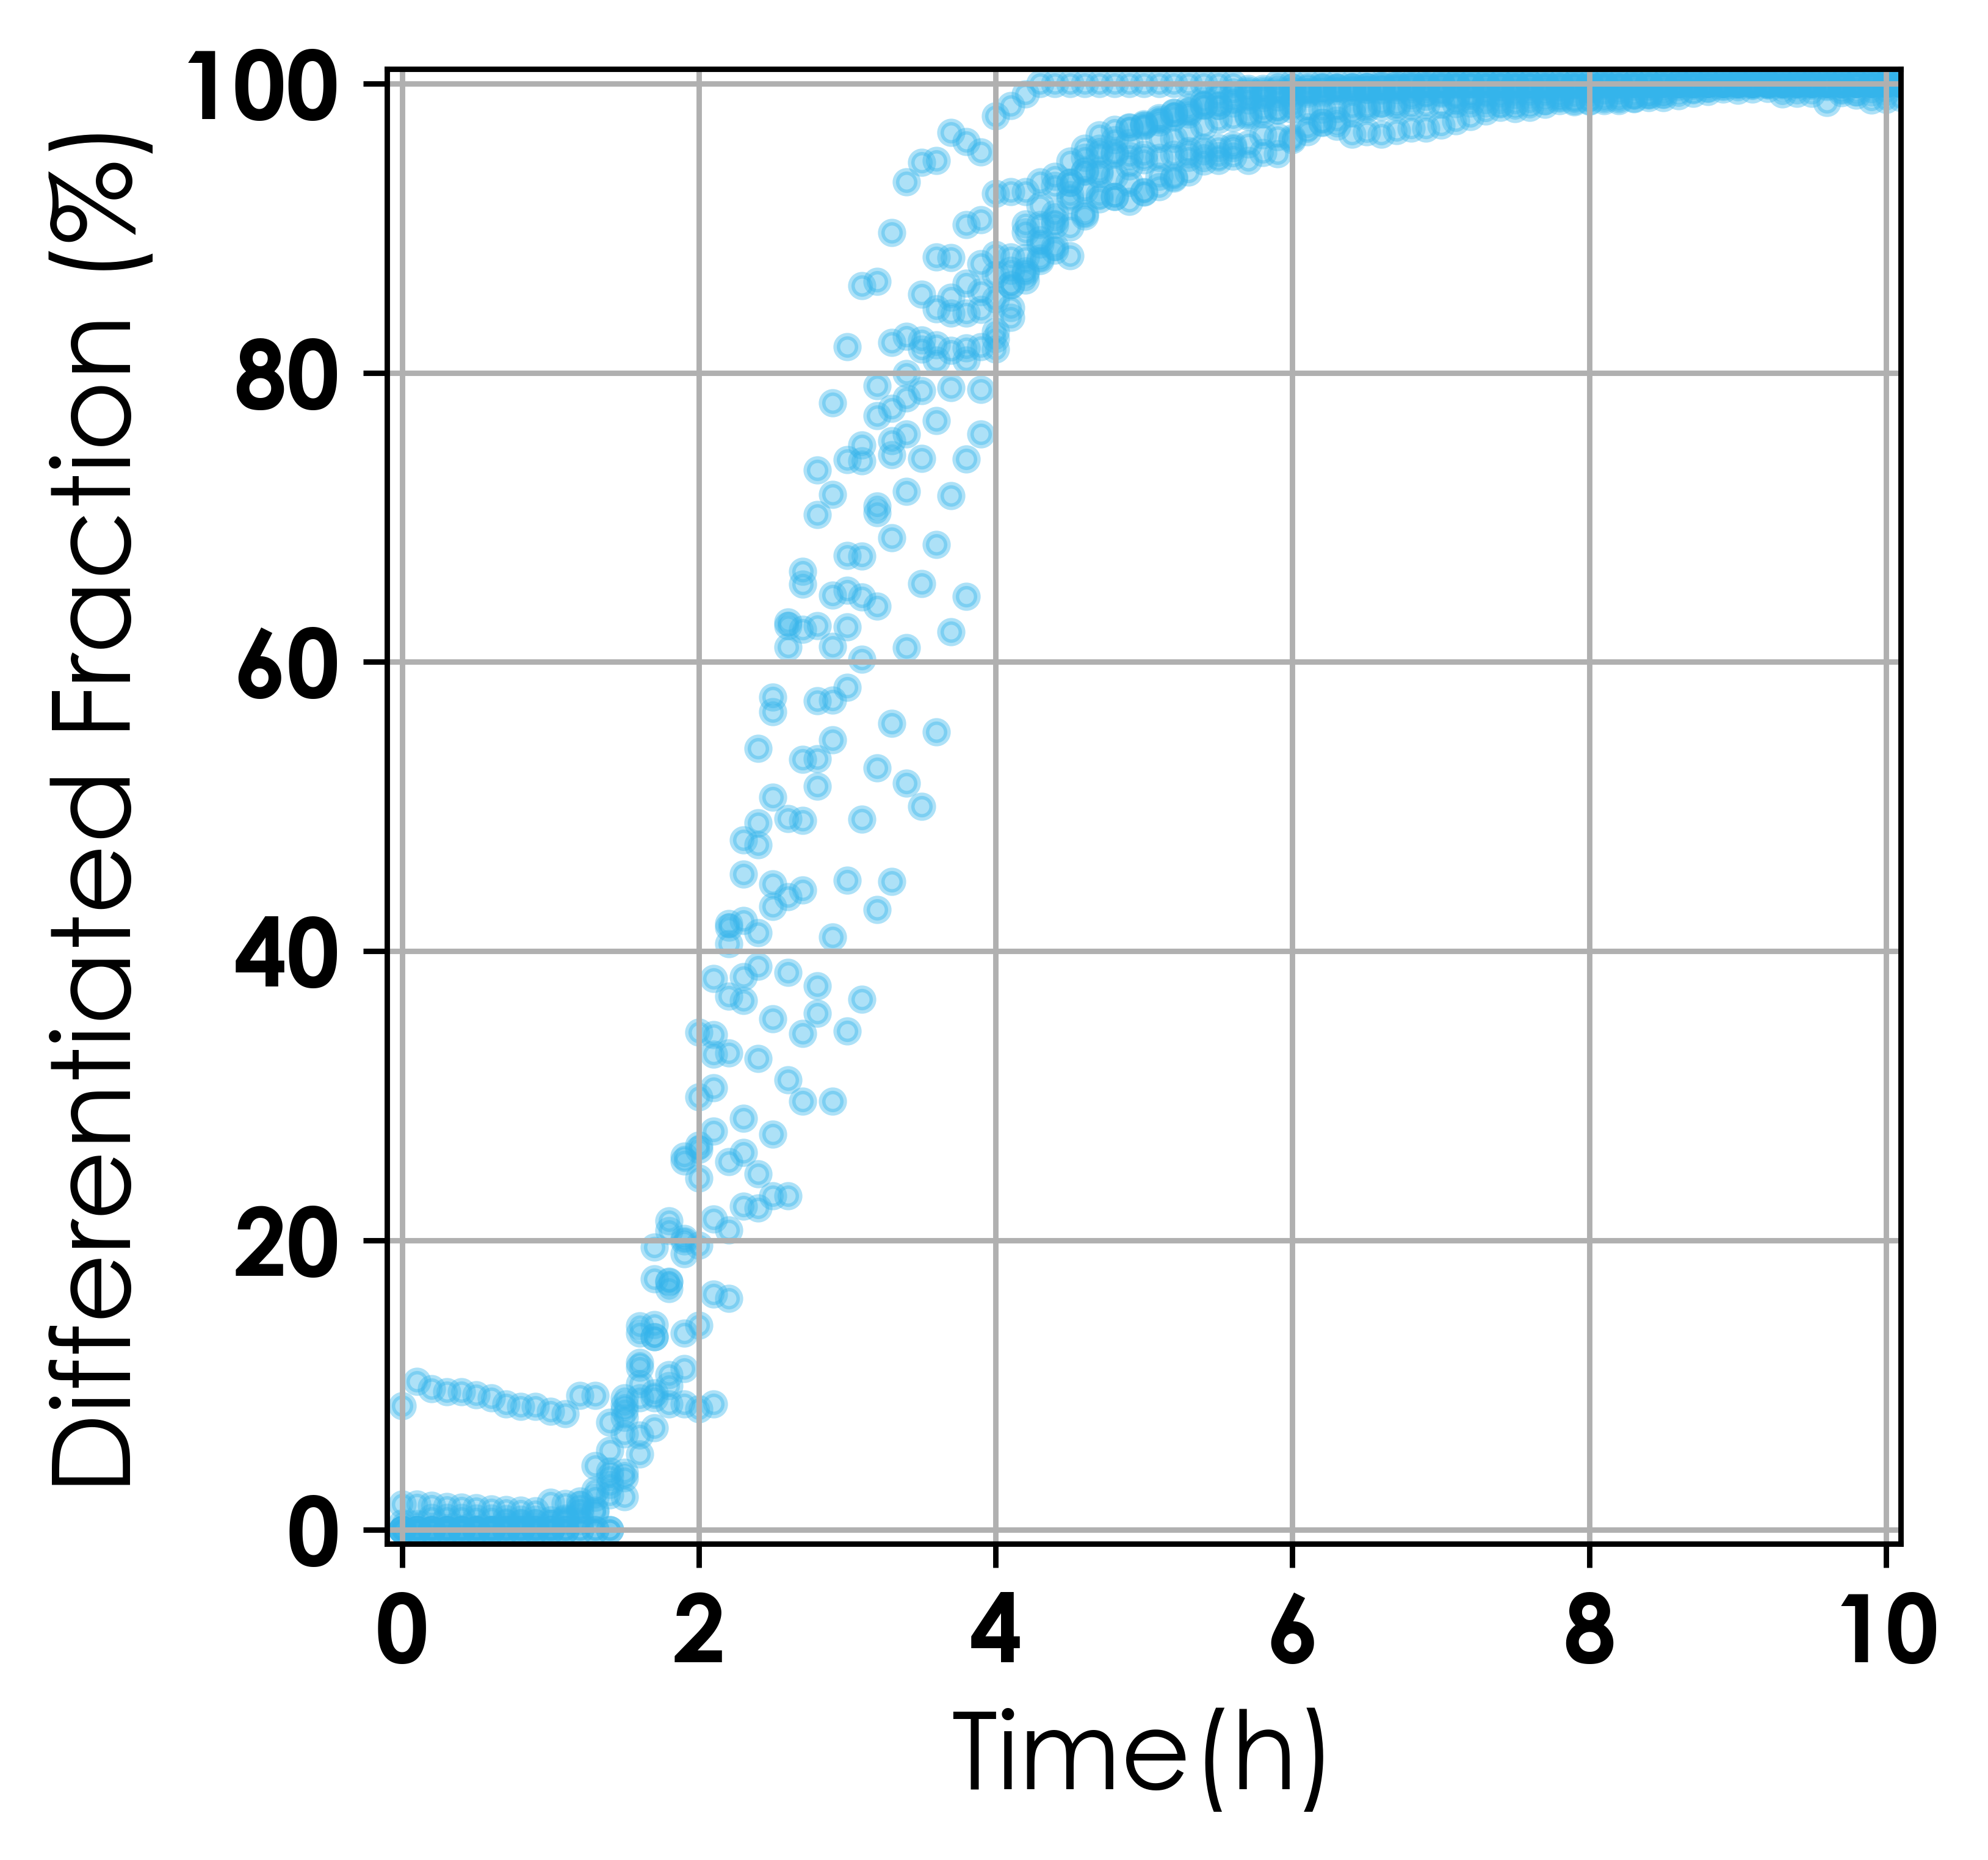

In [6]:
fig, ax1 = plt.subplots(1,1,figsize=(4, 4), dpi=800, facecolor='w', edgecolor='k')
gg = []
pp = []
fs =18
for pos in ['pos0','pos1','pos2','pos3','pos4','pos5']:
    print(pos)
    t,g,p,_ =rec_micro(data[pos],color = '#25cbf1',threshx =100,threshy =150,thresh_c=300,thresh_g=500,t_end = 101)
    ax1.scatter(t[:len(p)]/10,g*100,s = 10,alpha = 0.4,color ='#34b4eb')
    gg.append(g)
    pp.append(p)
for pos in ['pos0','pos1']:
    print(pos)
    t,g,p,_ =rec_micro(data2[pos],color = '#25cbf1',threshx =100,threshy =150,thresh_c=300,thresh_g=500,t_end = 101)
    ax1.scatter(t[:len(p)]/10,g*100,s = 10,alpha = 0.4,color ='#34b4eb')
    gg.append(g)
    pp.append(p)


ax1.set_xticks([0,2,4,6,8,10])
ax1.set_xticklabels(['0','2','4','6','8','10'], fontsize=fs-4,**cgfont)
ax1.set_yticks([0,20,40,60,80,100])
ax1.set_yticklabels(['0','20','40','60','80','100'], fontsize=fs-4,**cgfont)
ax1.set_ylabel('Differentiated Fraction (%)', fontsize=fs-2,**cgfont)
ax1.set_xlabel('Time(h)', fontsize=fs-2,**cgfont)

ax1.set_ylim(-1,101)
ax1.set_xlim(-0.1,10.1)
ax1.grid(True)

# plt.savefig(out_path_plot +'FigureS2e.eps',bbox_inches='tight')
# plt.savefig(out_path_plot +'FigureS2e.png',bbox_inches='tight')
# plt.savefig(out_path_plot +'FigureS2e.svg',bbox_inches='tight')

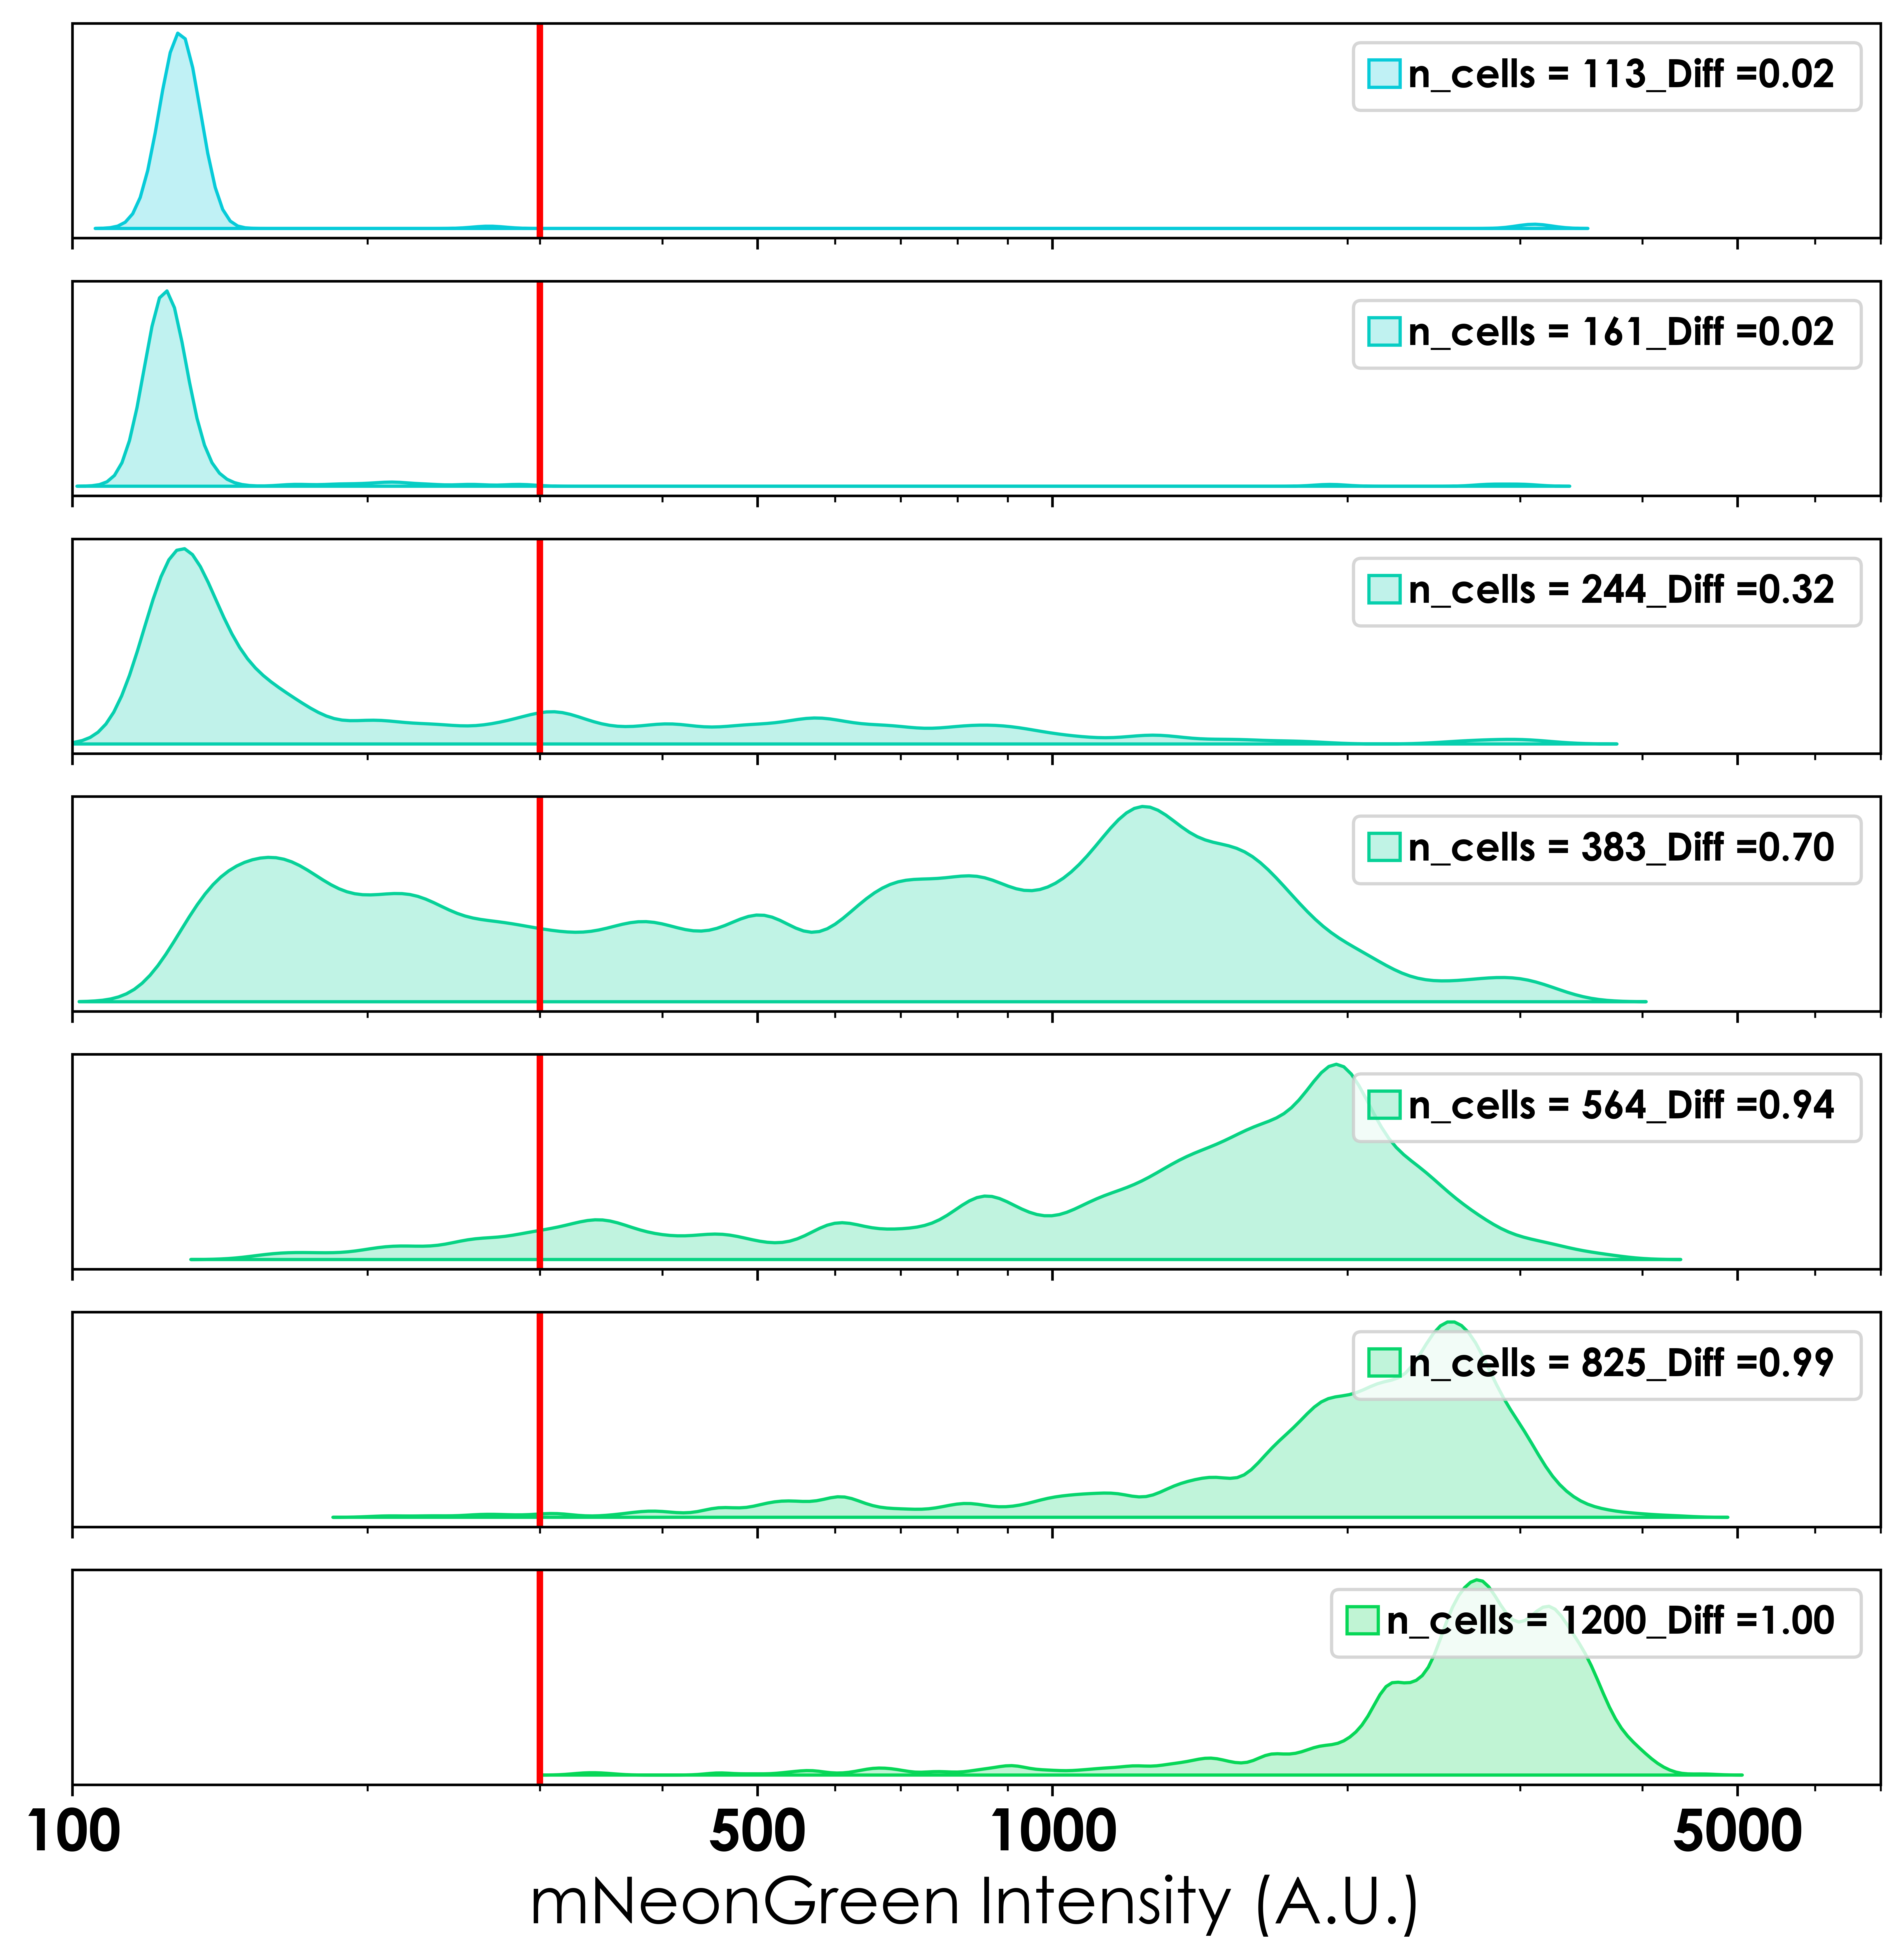

In [7]:
tps = [0,10,20,30,40,50,60]
dist = list(np.arange(len(tps)))
p = list(np.arange(len(tps)))
g = list(np.arange(len(tps)))
fs = 18
fig,axes = plt.subplots(len(tps),1,figsize = (10,10), dpi =800, edgecolor ='w',sharex=True, sharey=False)
axes = axes.flatten()
evenly_spaced_interval = np.linspace(0, 1,len(axes)+1)
c1 = '#07cbd9'
c2 = '#07d942'
c2g = matplotlib.colors.LinearSegmentedColormap.from_list("", [c1,c2])
colors = [c2g(x) for x in evenly_spaced_interval]
for jj,tp in enumerate(tps):
    
    t,g[jj],p[jj],dist[jj] =rec_micro(data['pos0'],color = '#25cbf1',threshx =100,threshy =150,thresh_c=500,thresh_g=300,t_end = 101,cut =tp)

    
for jj,ax in enumerate(axes):
    
    sns.kdeplot(dist[jj][0],ax =ax, bw_method = 0.35,color =colors[jj],  bw_adjust=.25,log_scale =10,fill =True,label = (str('n_cells = %d'%p[jj][tps[jj]]) +str('_Diff =%0.2f ' %g[jj][tps[jj]]) ))
    ax.set_xlim(100,7000)
    L1 =ax.legend(ncol = 1,fontsize=fs-6,loc = 'upper right',columnspacing = 0.4,title_fontsize = fs-2,handlelength = 0.8,handletextpad = 0.2)
    plt.setp(L1.texts, **cgfont)
    L1._legend_box.align = "center"    
    ax.axvline(x =300,c ='r',lw = 2)
    ax.set_yticks([])
    ax.set_ylabel('')
    ax.set_xticks([100,500,1000,5000])
    ax.set_xticklabels(['100','500','1000','5000'], fontsize=fs,**cgfont)

    ax.set_xlabel('mNeonGreen Intensity (A.U.)', fontsize=fs+2,**cgfont)
    

# plt.savefig(out_path_plot +'FigureS2d.eps',bbox_inches='tight')
# plt.savefig(out_path_plot +'FigureS2d.png',bbox_inches='tight')
# plt.savefig(out_path_plot +'FigureS2d.svg',bbox_inches='tight')

pos0
0


d:\miniconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[0.39590357 4.72255086 1.        ]
0.3959035715999012
pos1
1
[0.44342387 3.76266415 1.        ]
0.4434238654311117
pos2
2
[0.41148207 3.97772011 1.        ]
0.411482071471431
pos3
3
[0.38223469 5.05839905 1.        ]
0.3822346866765063
pos4
4
[0.34734456 4.62380635 1.        ]
0.34734455805424497
pos5
5
[0.38575004 5.31581261 1.        ]
0.3857500376251173


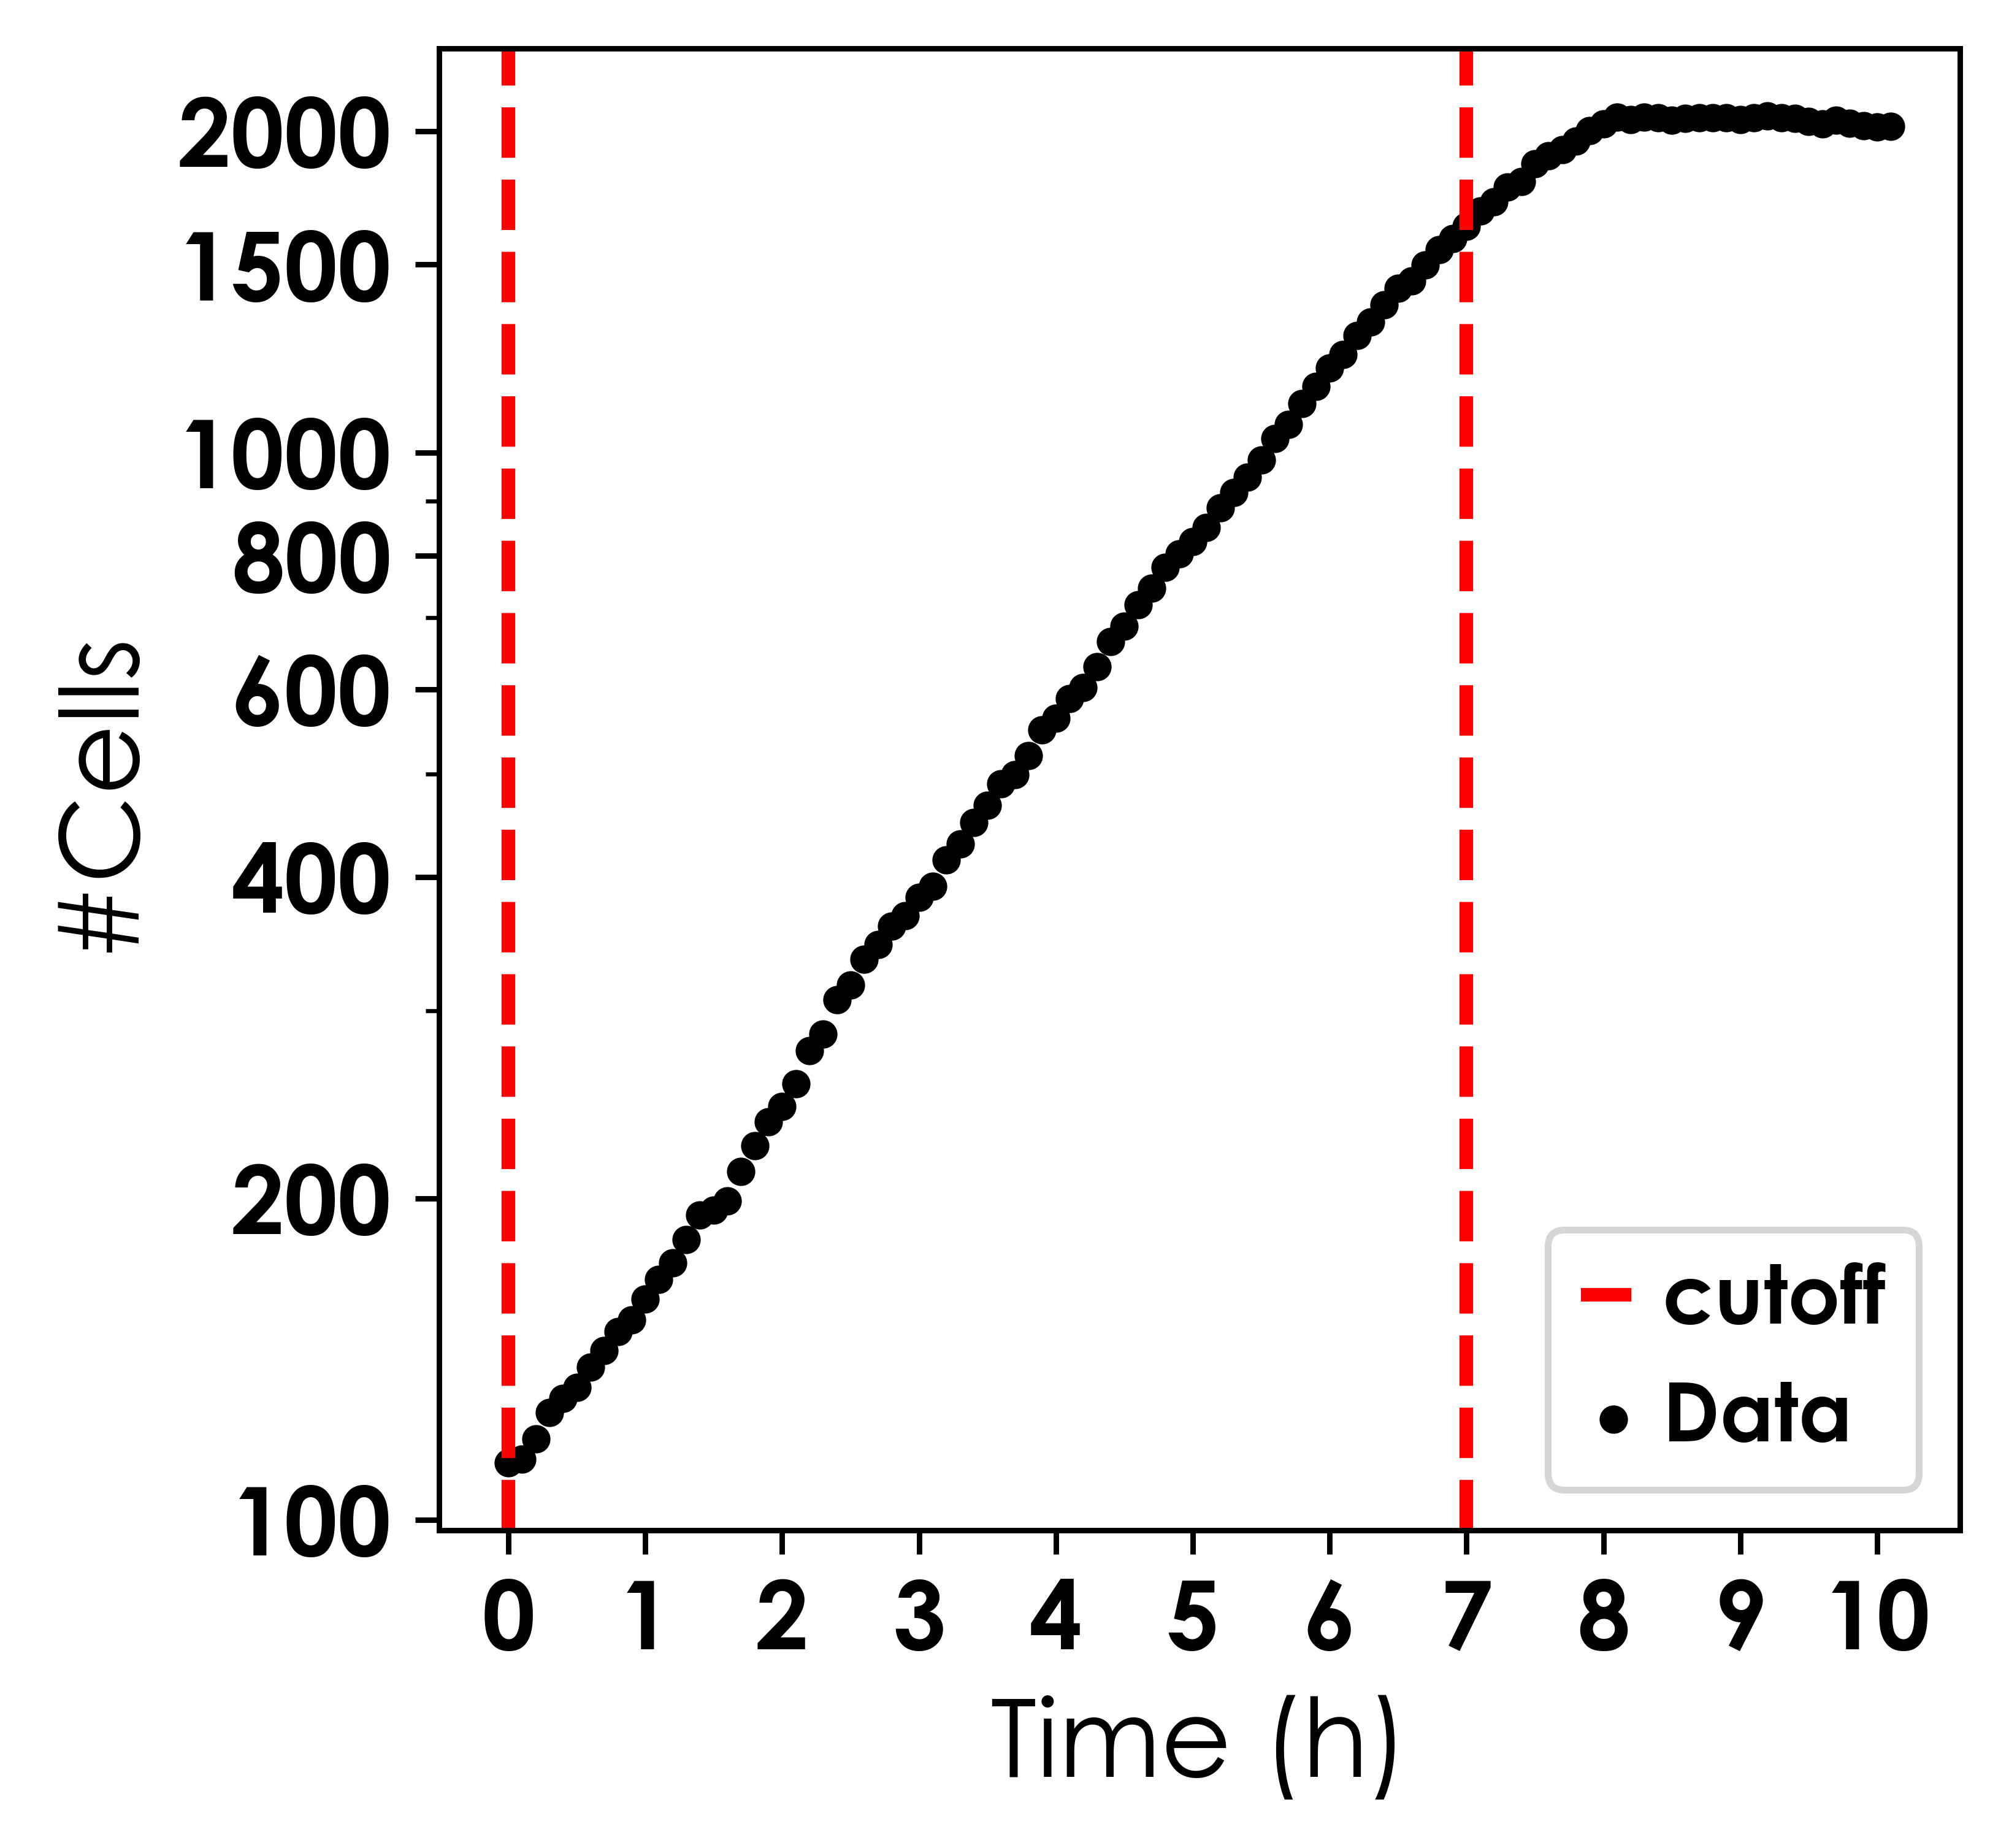

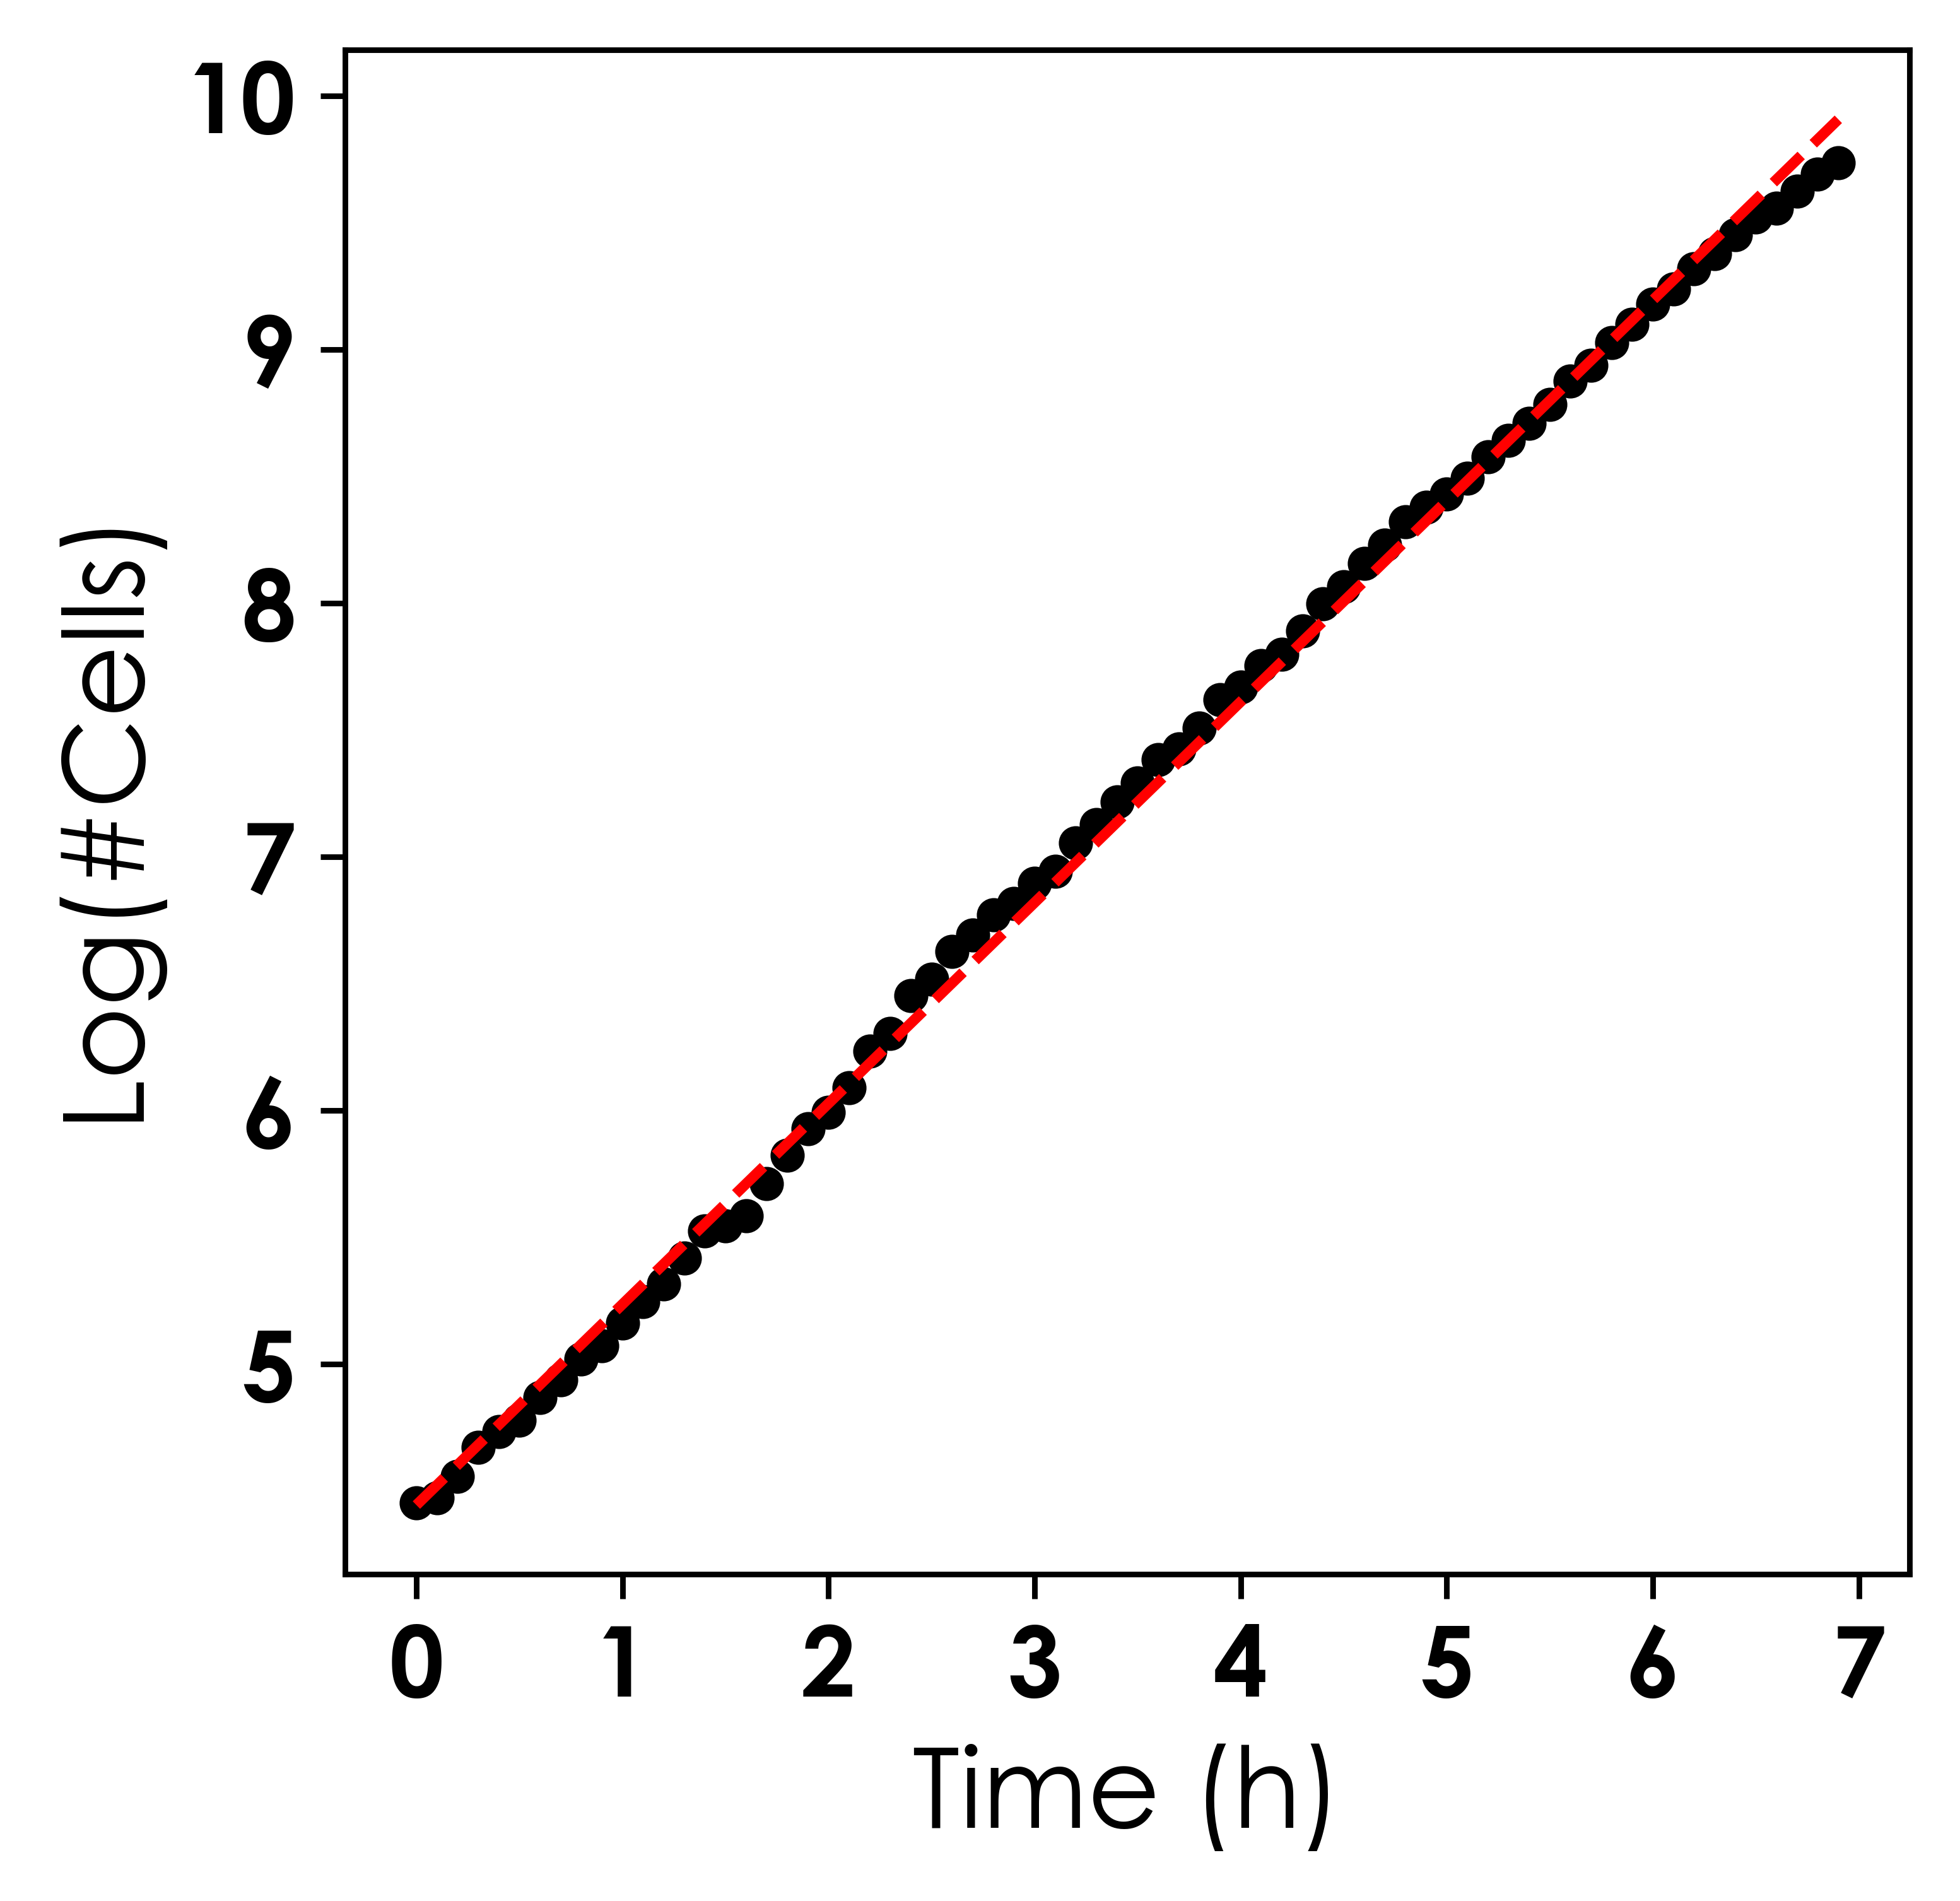

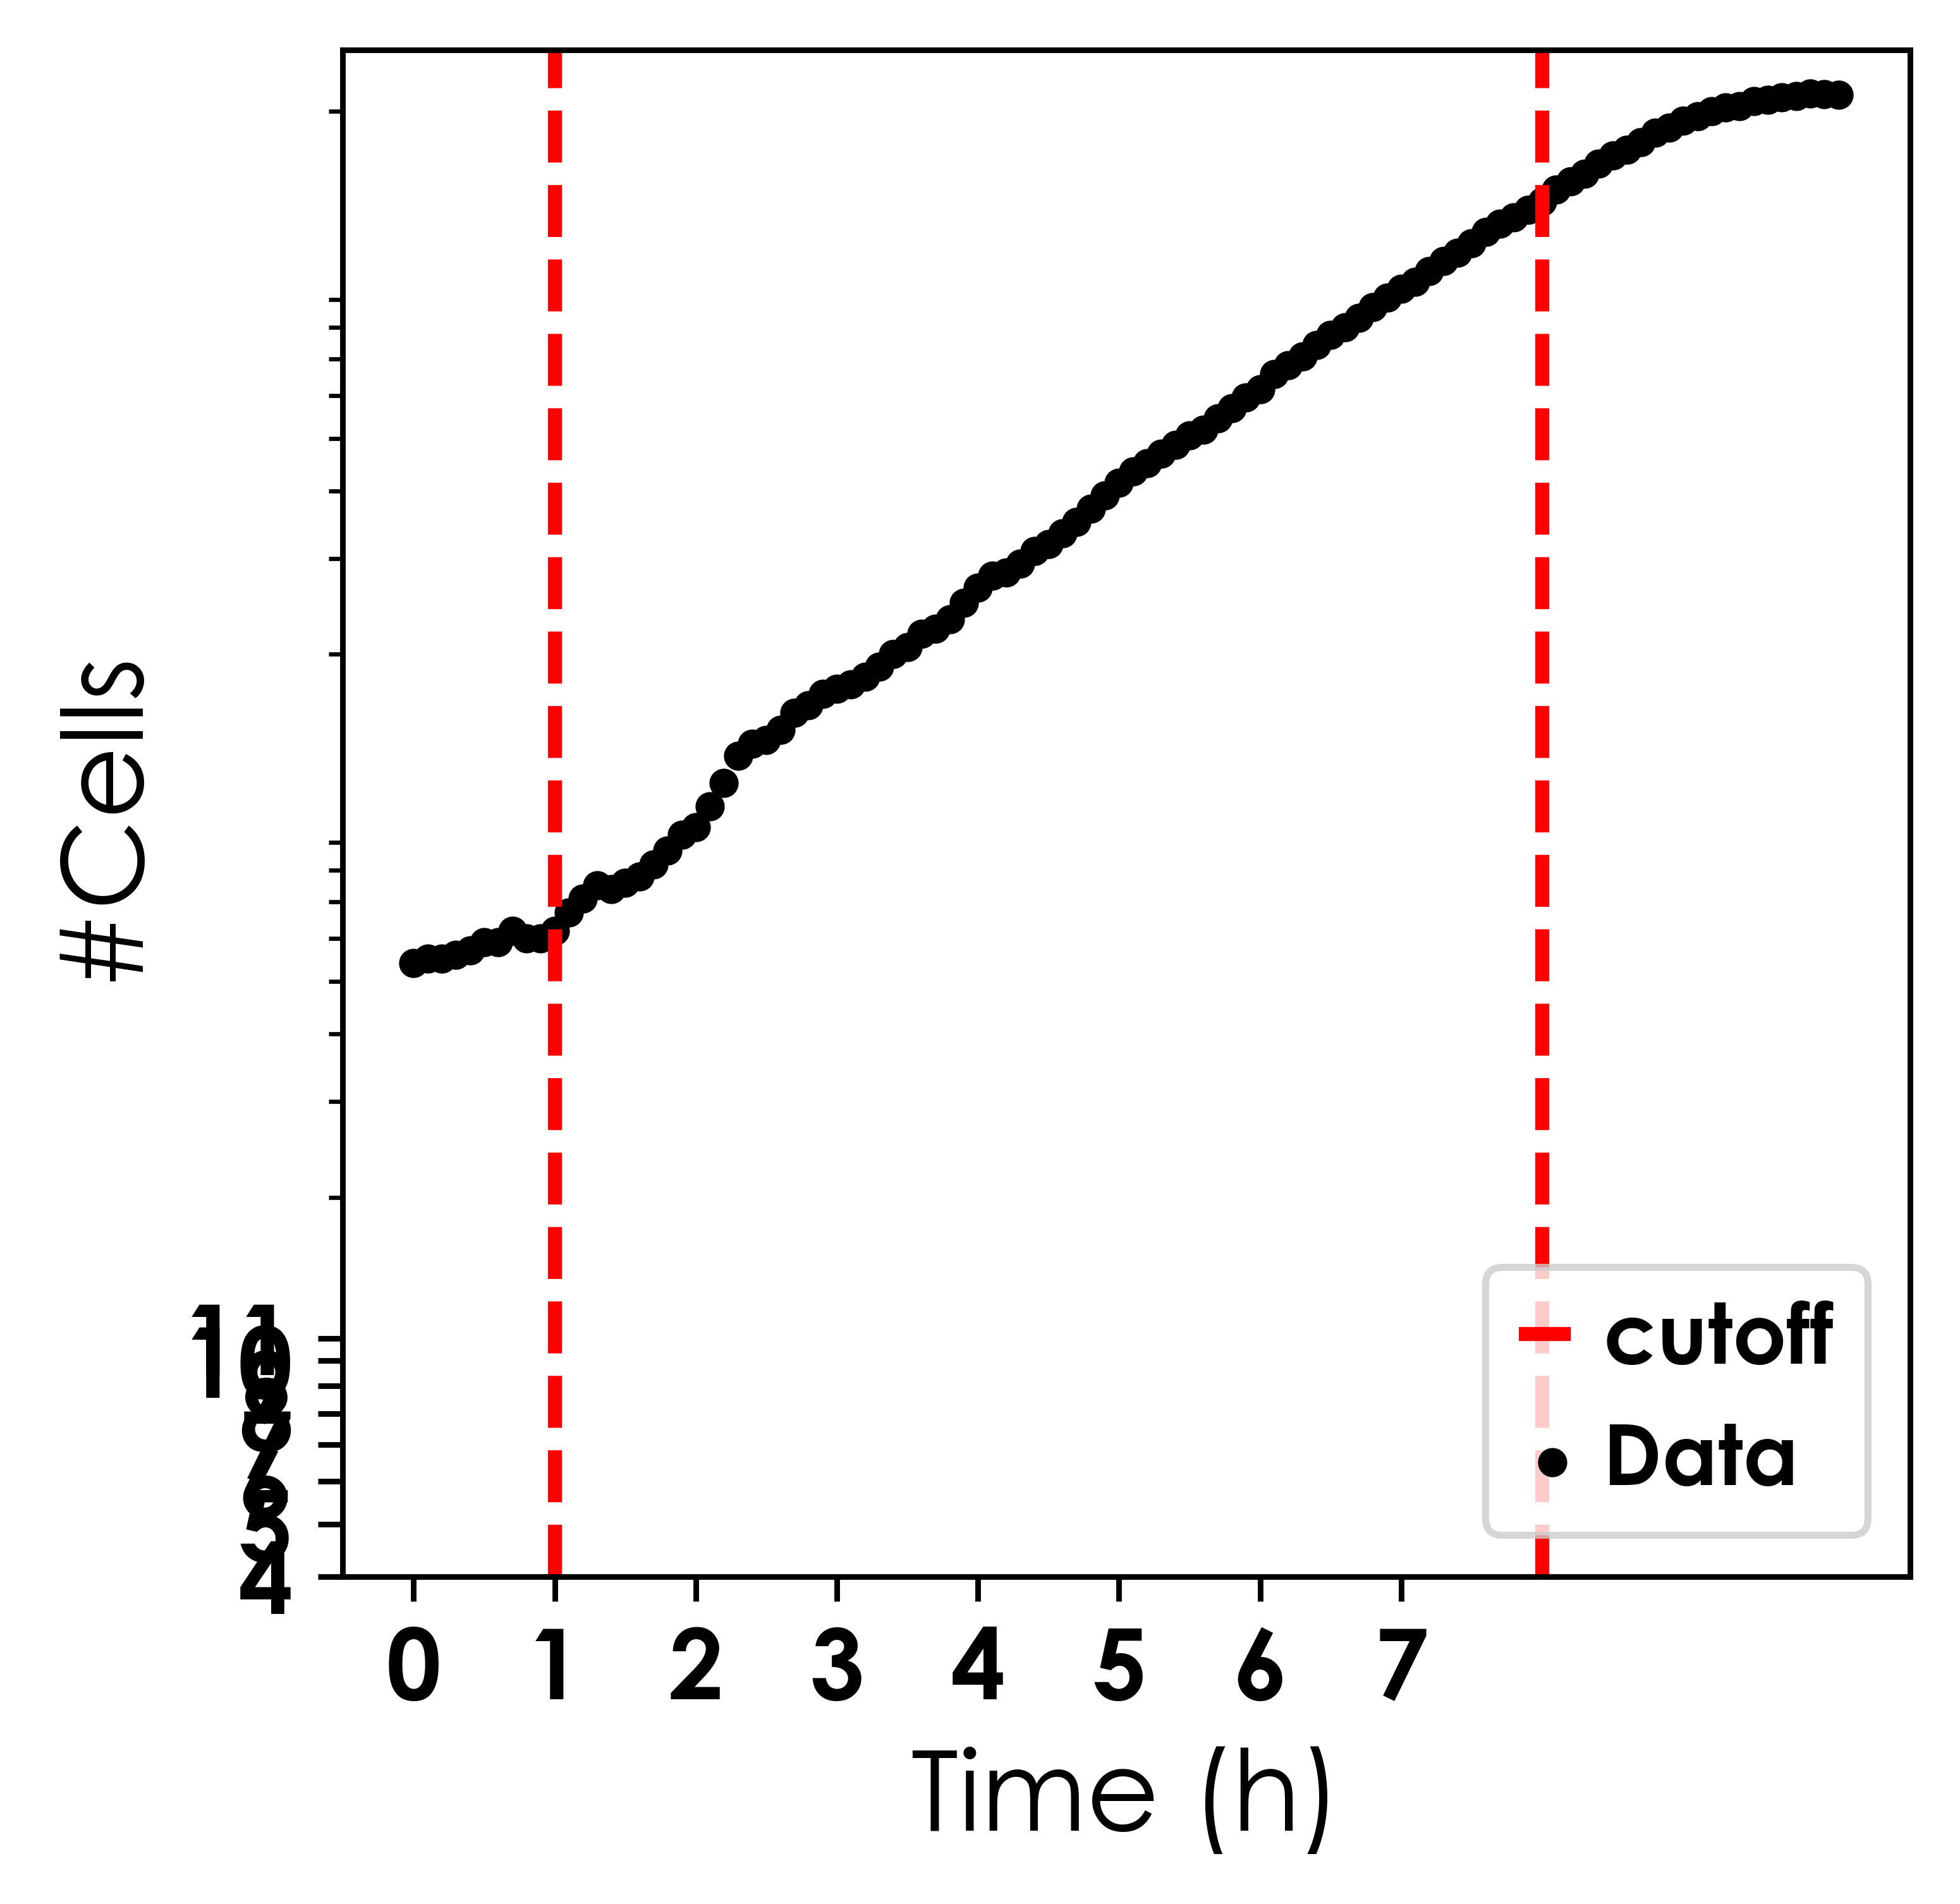

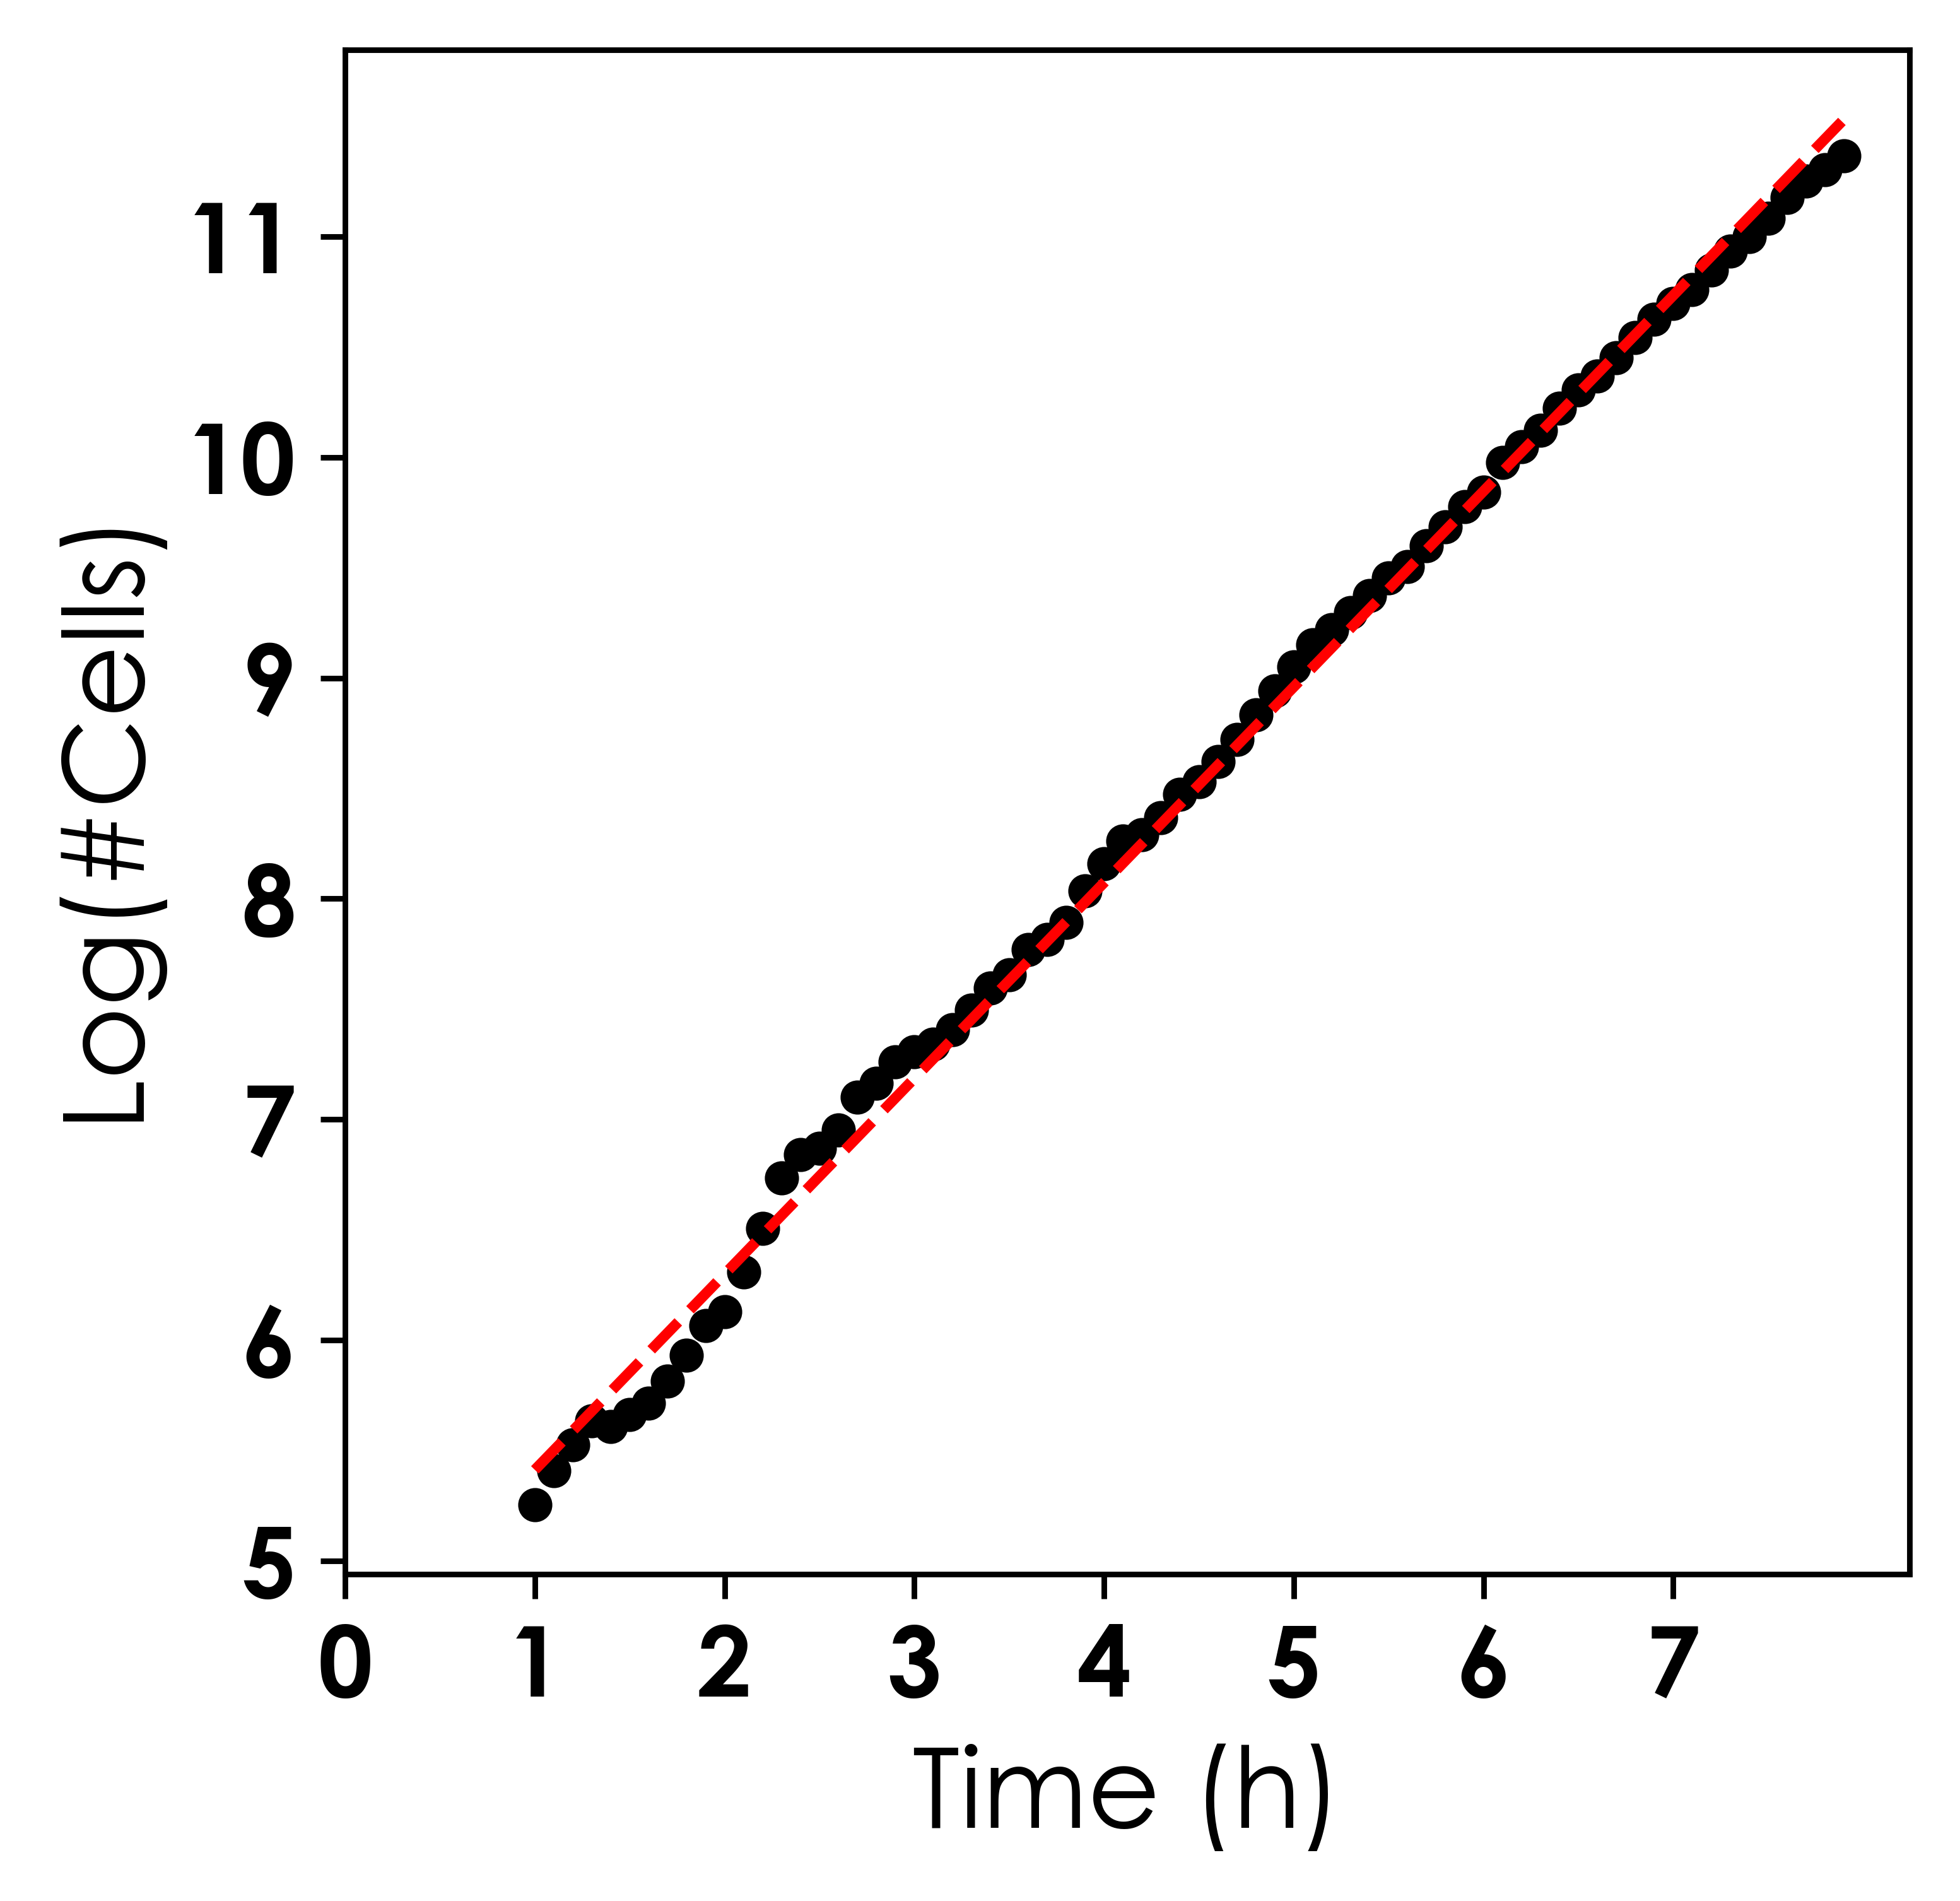

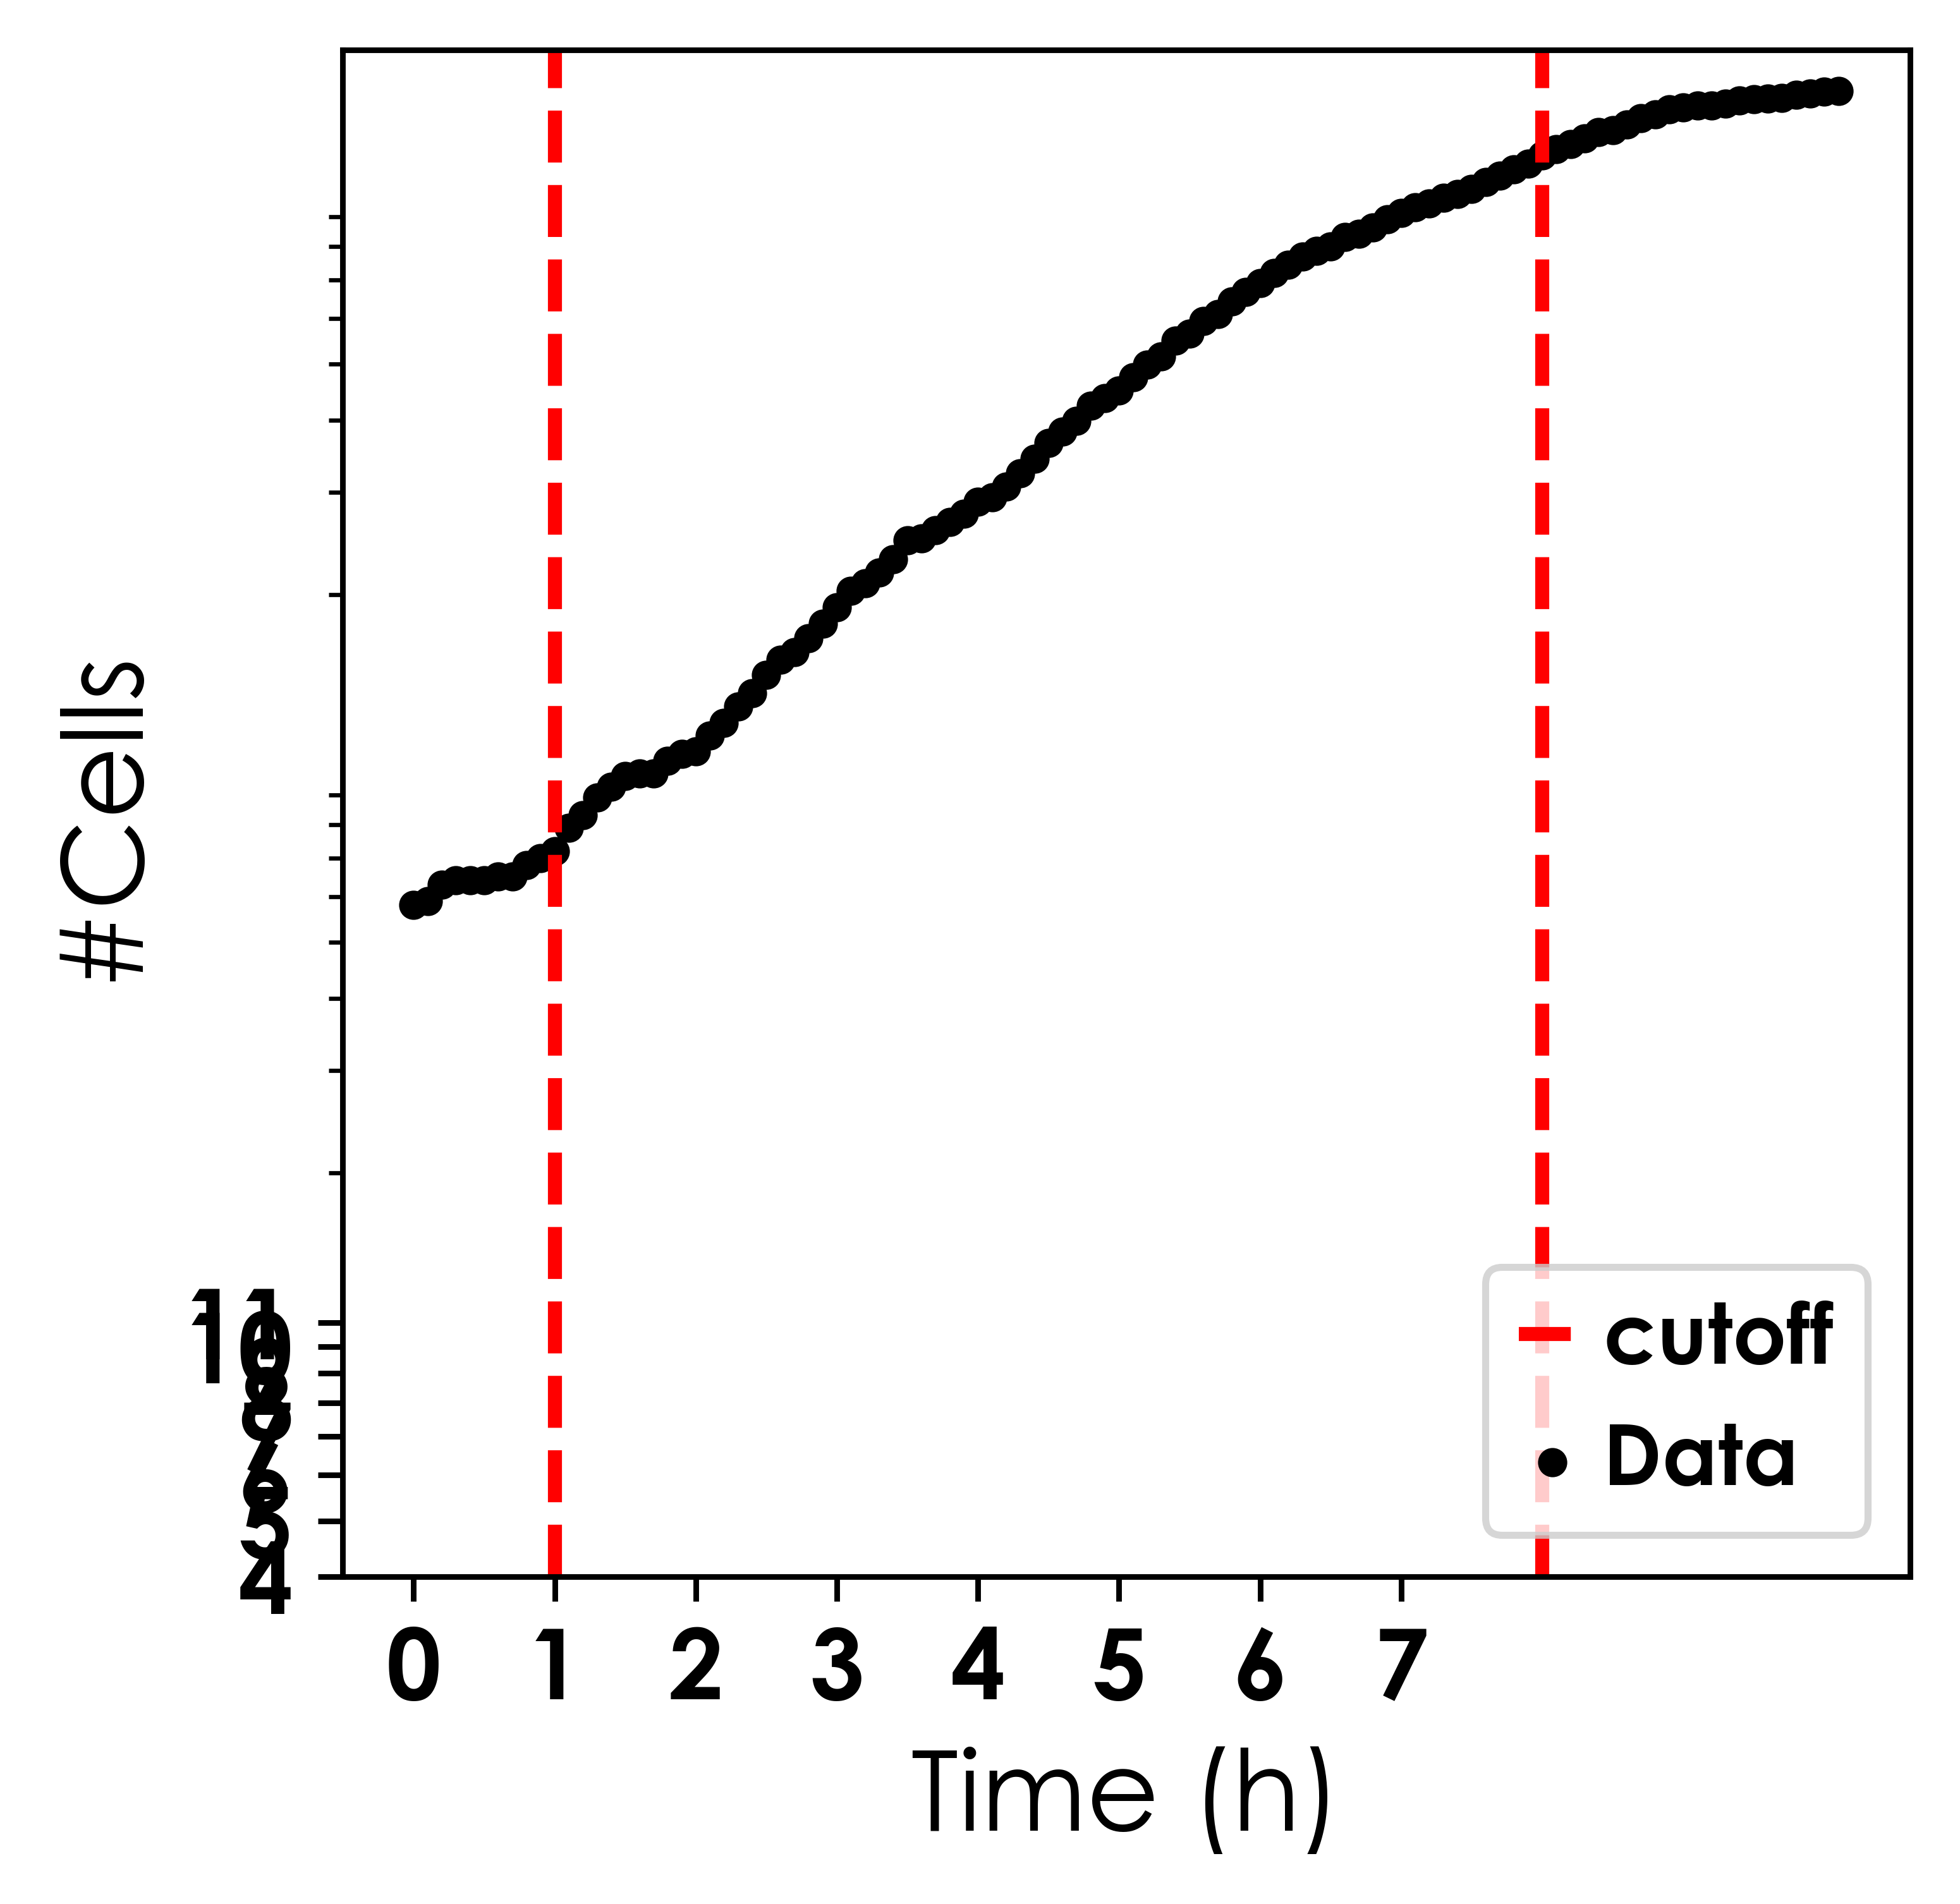

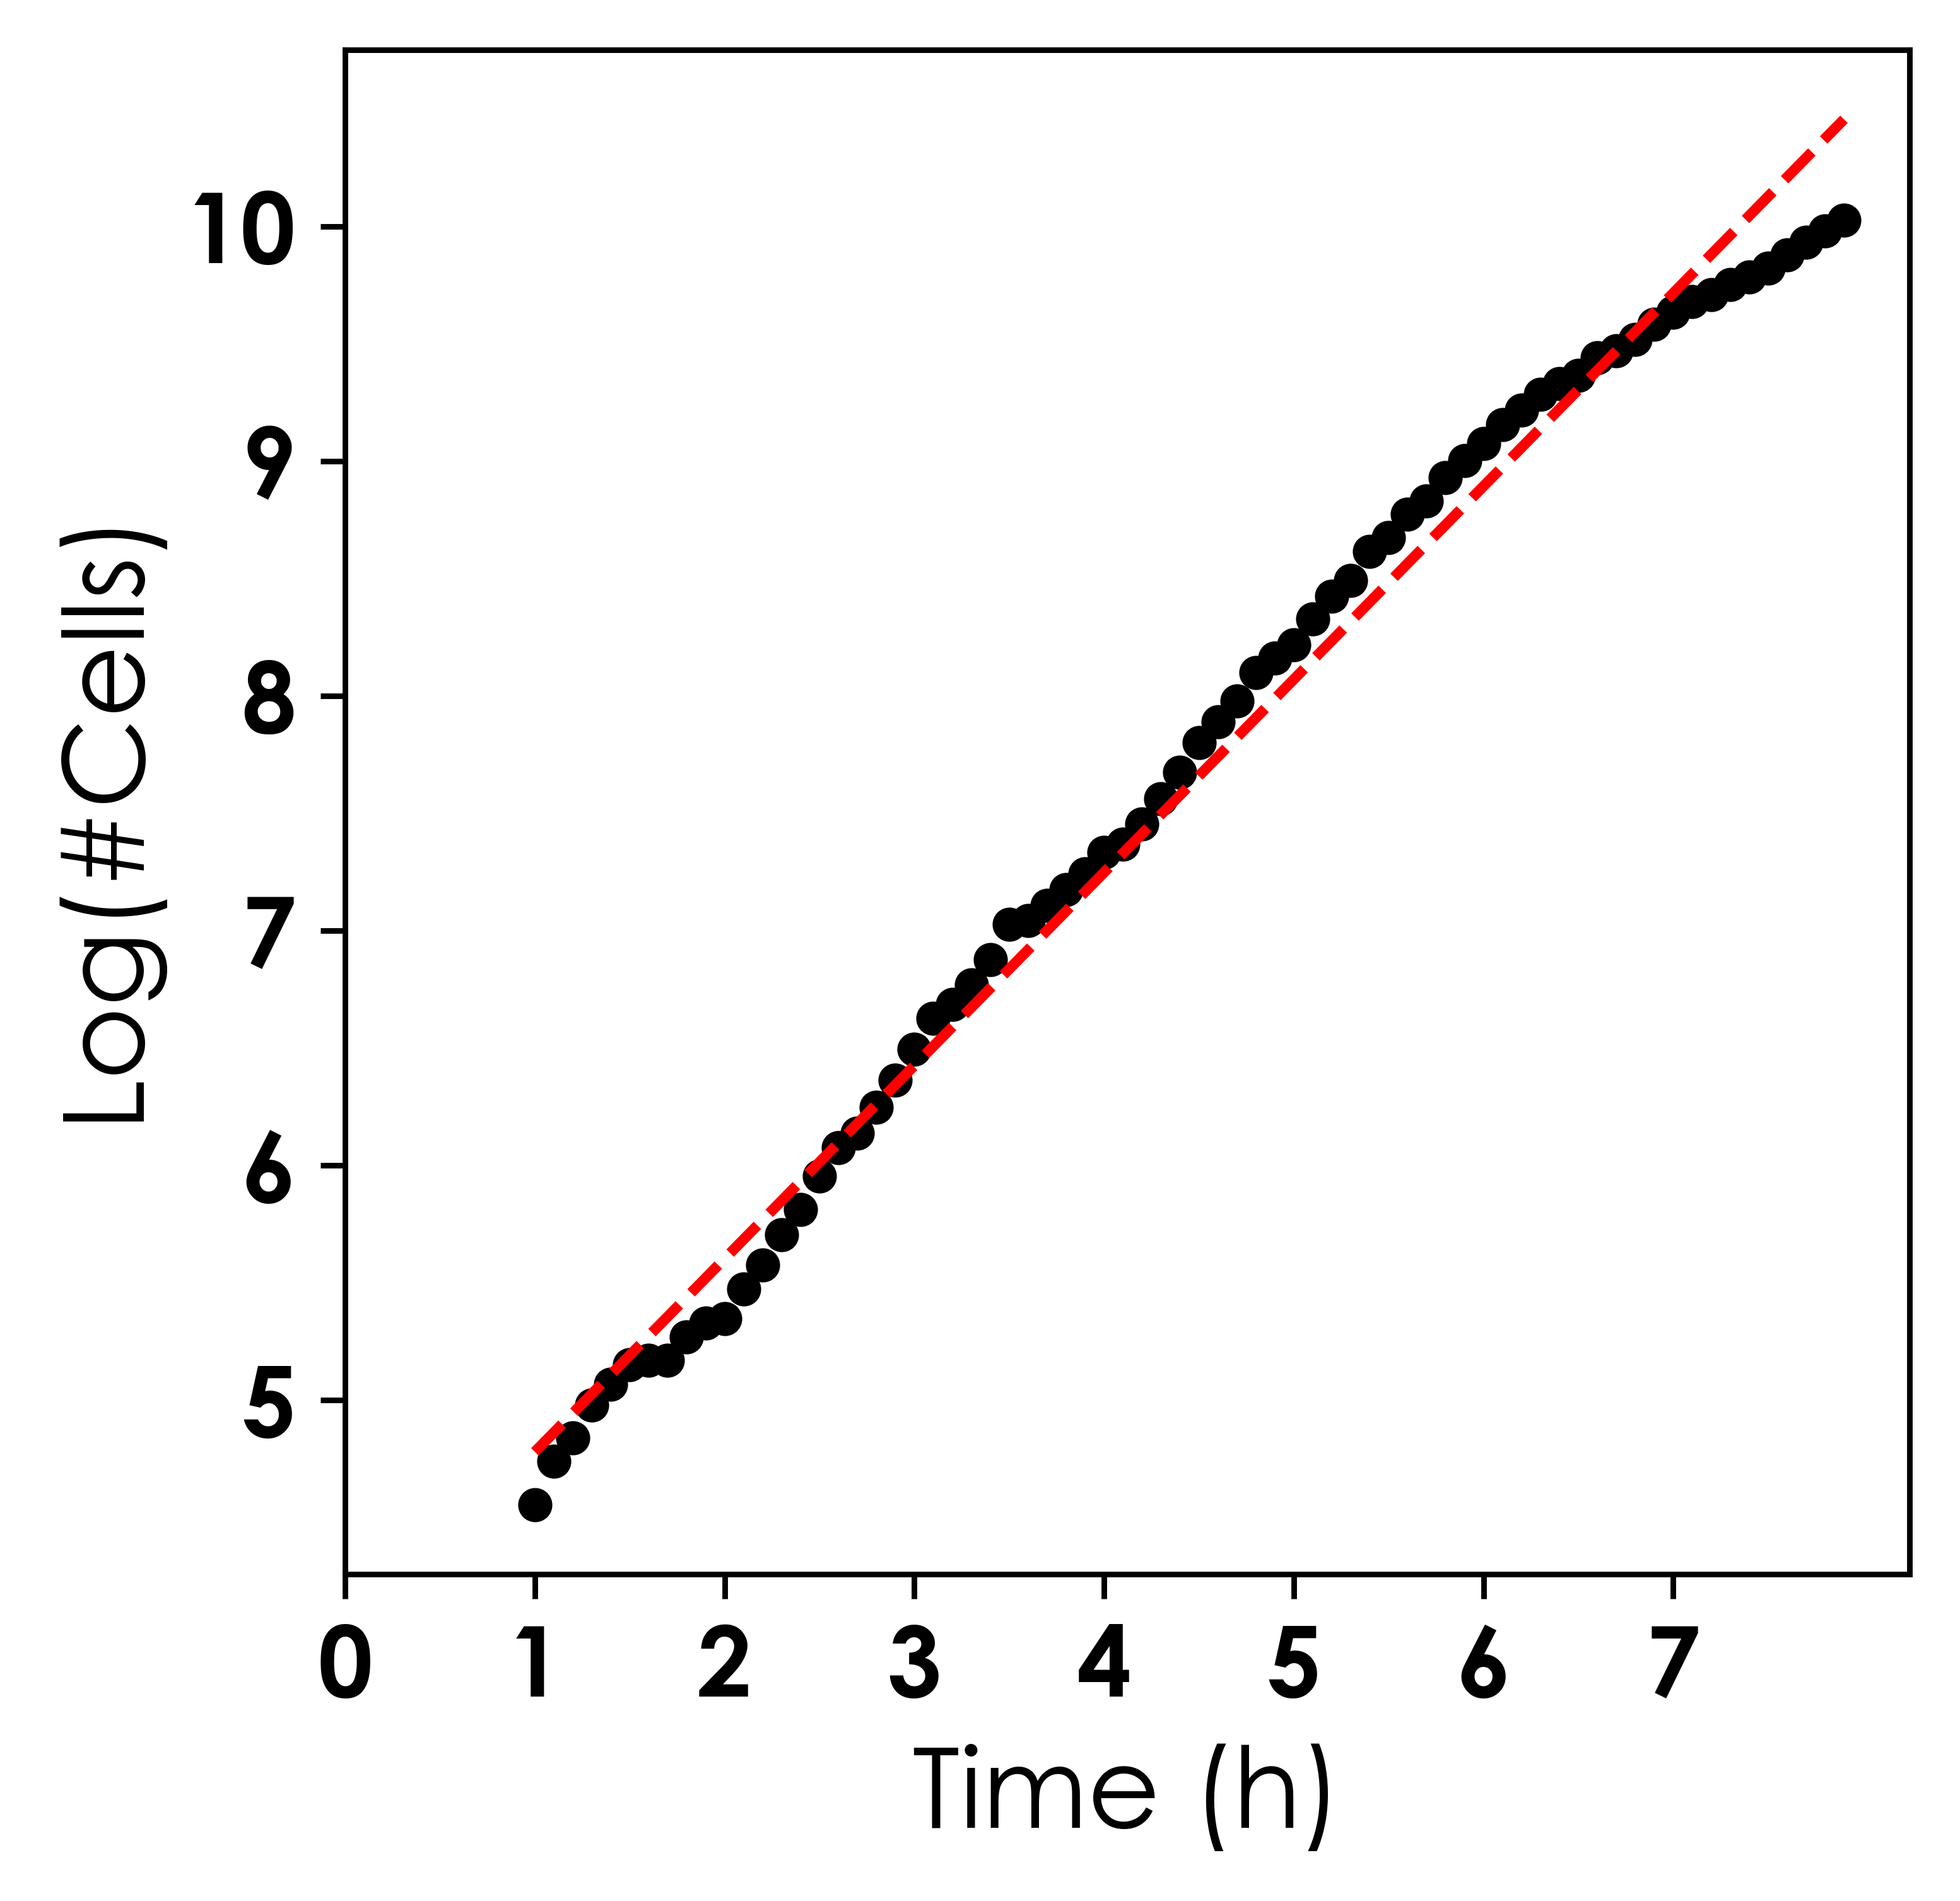

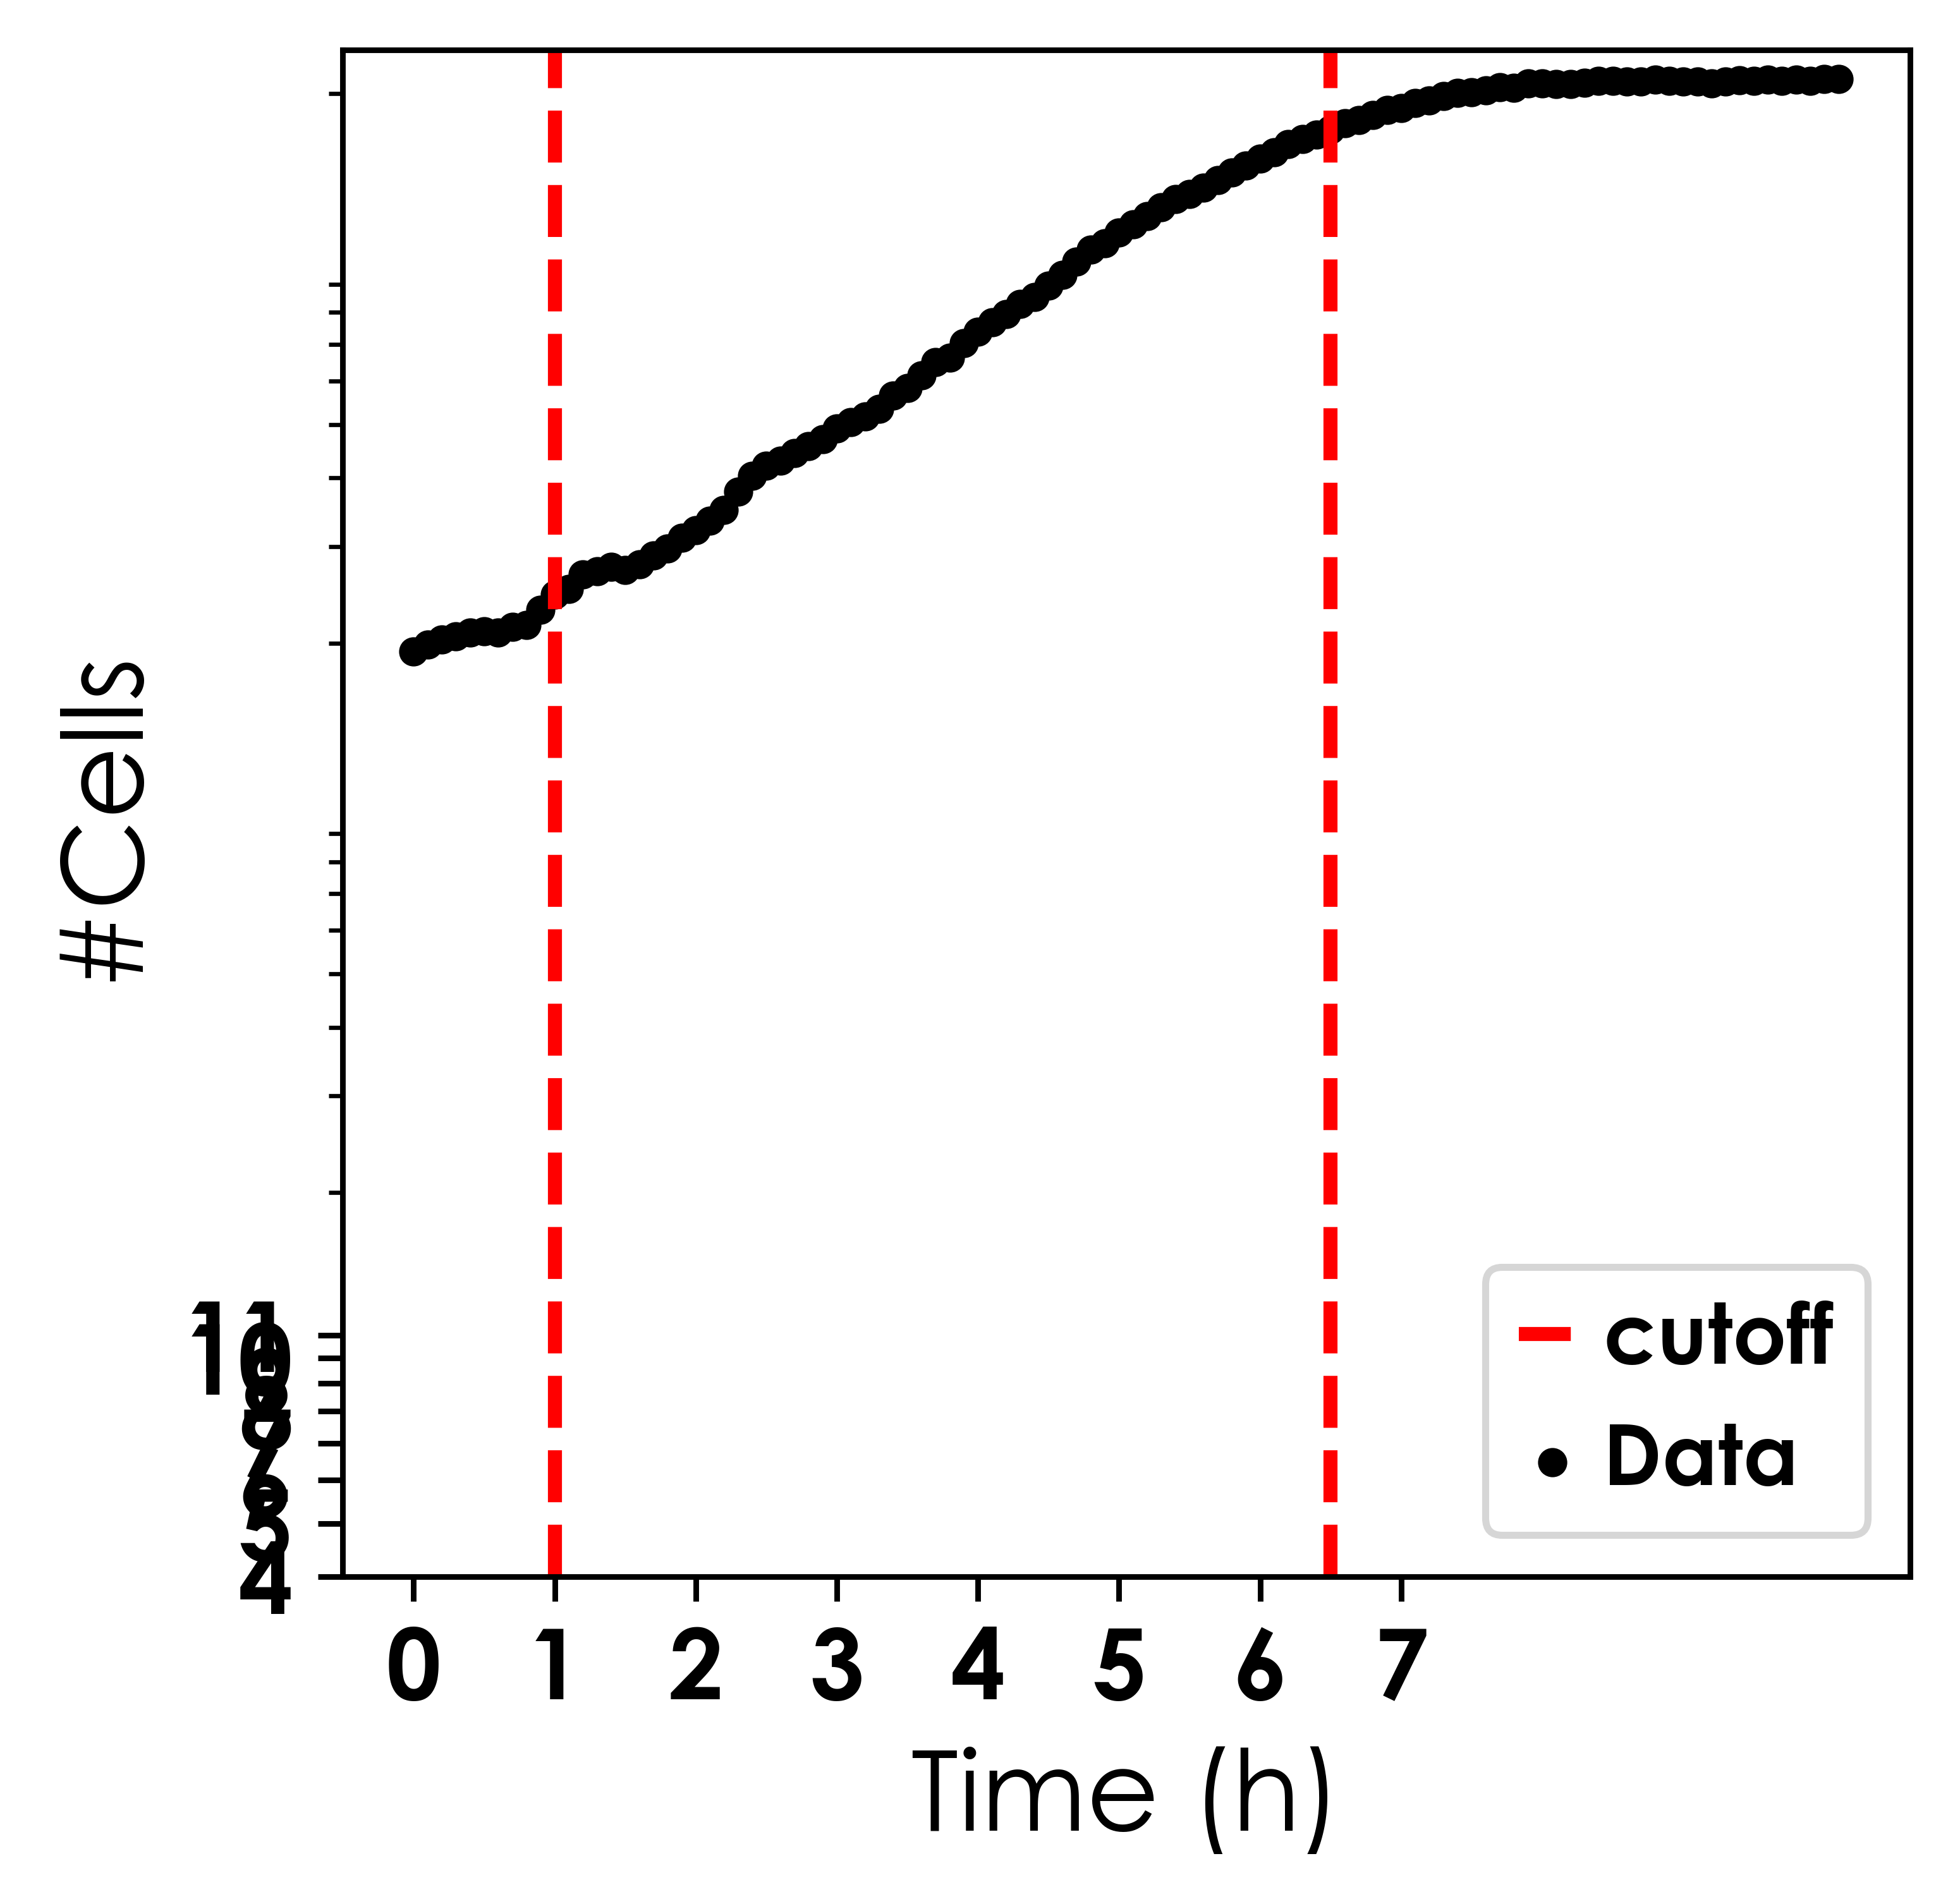

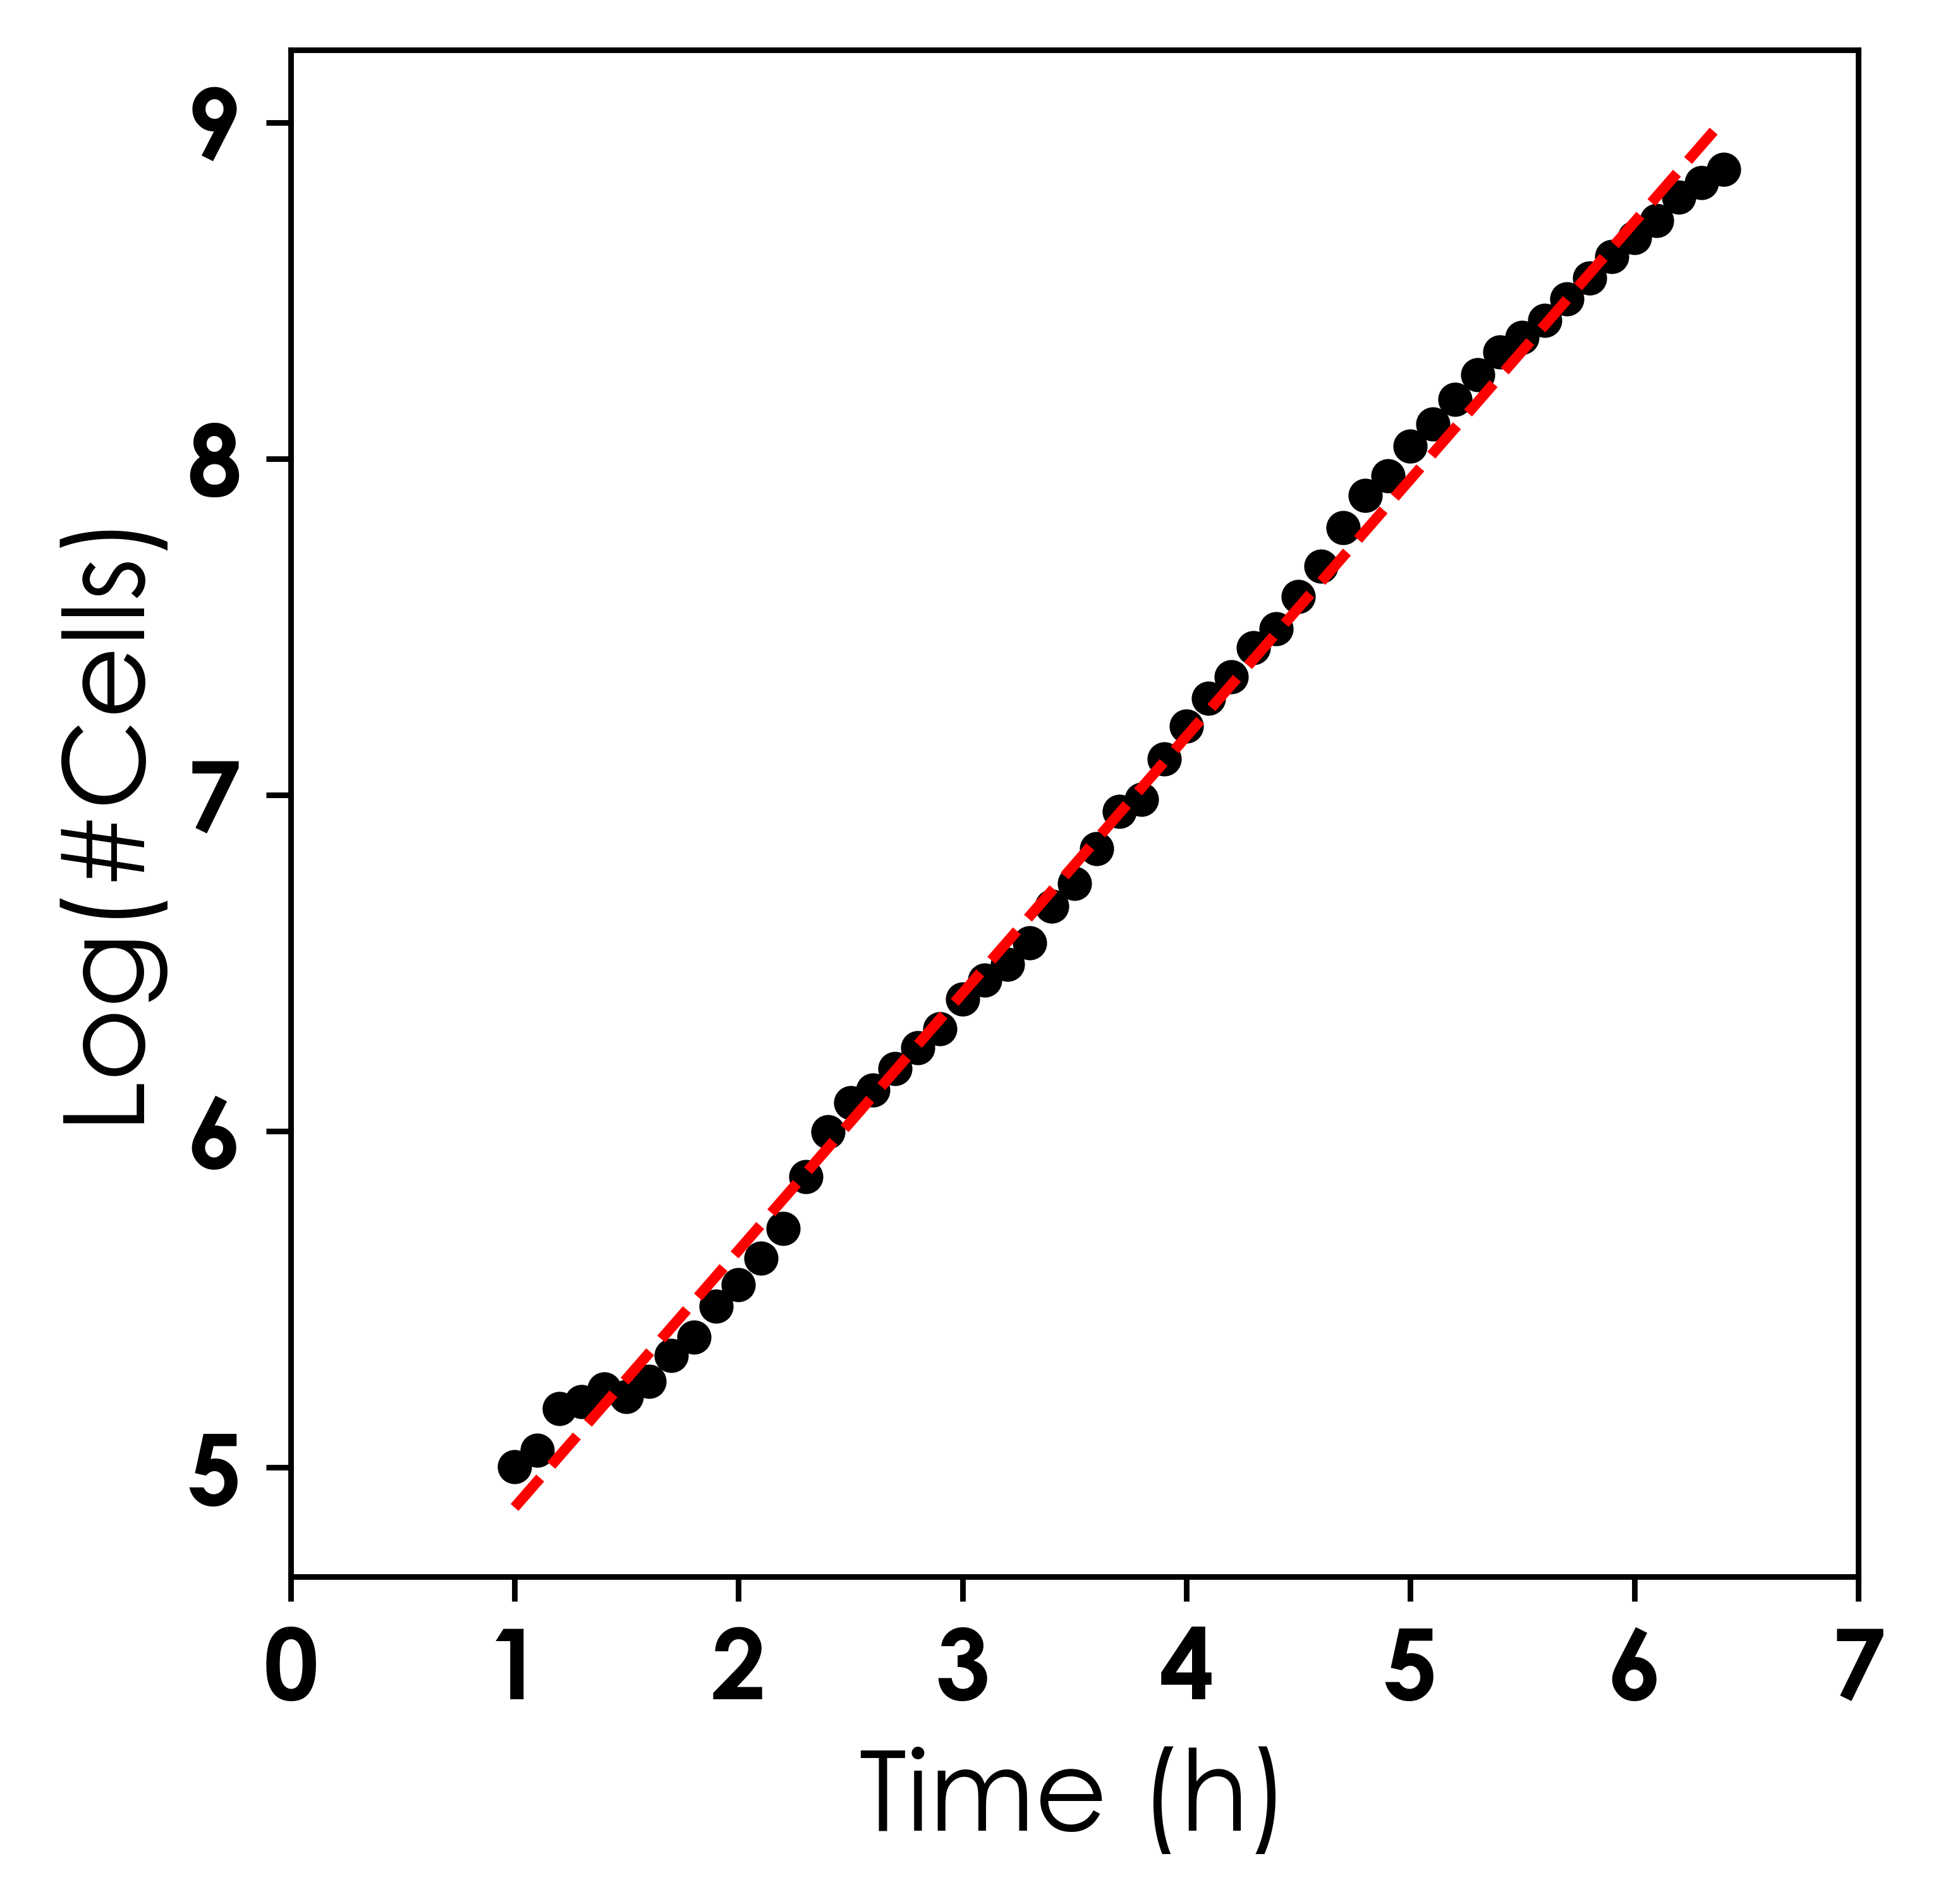

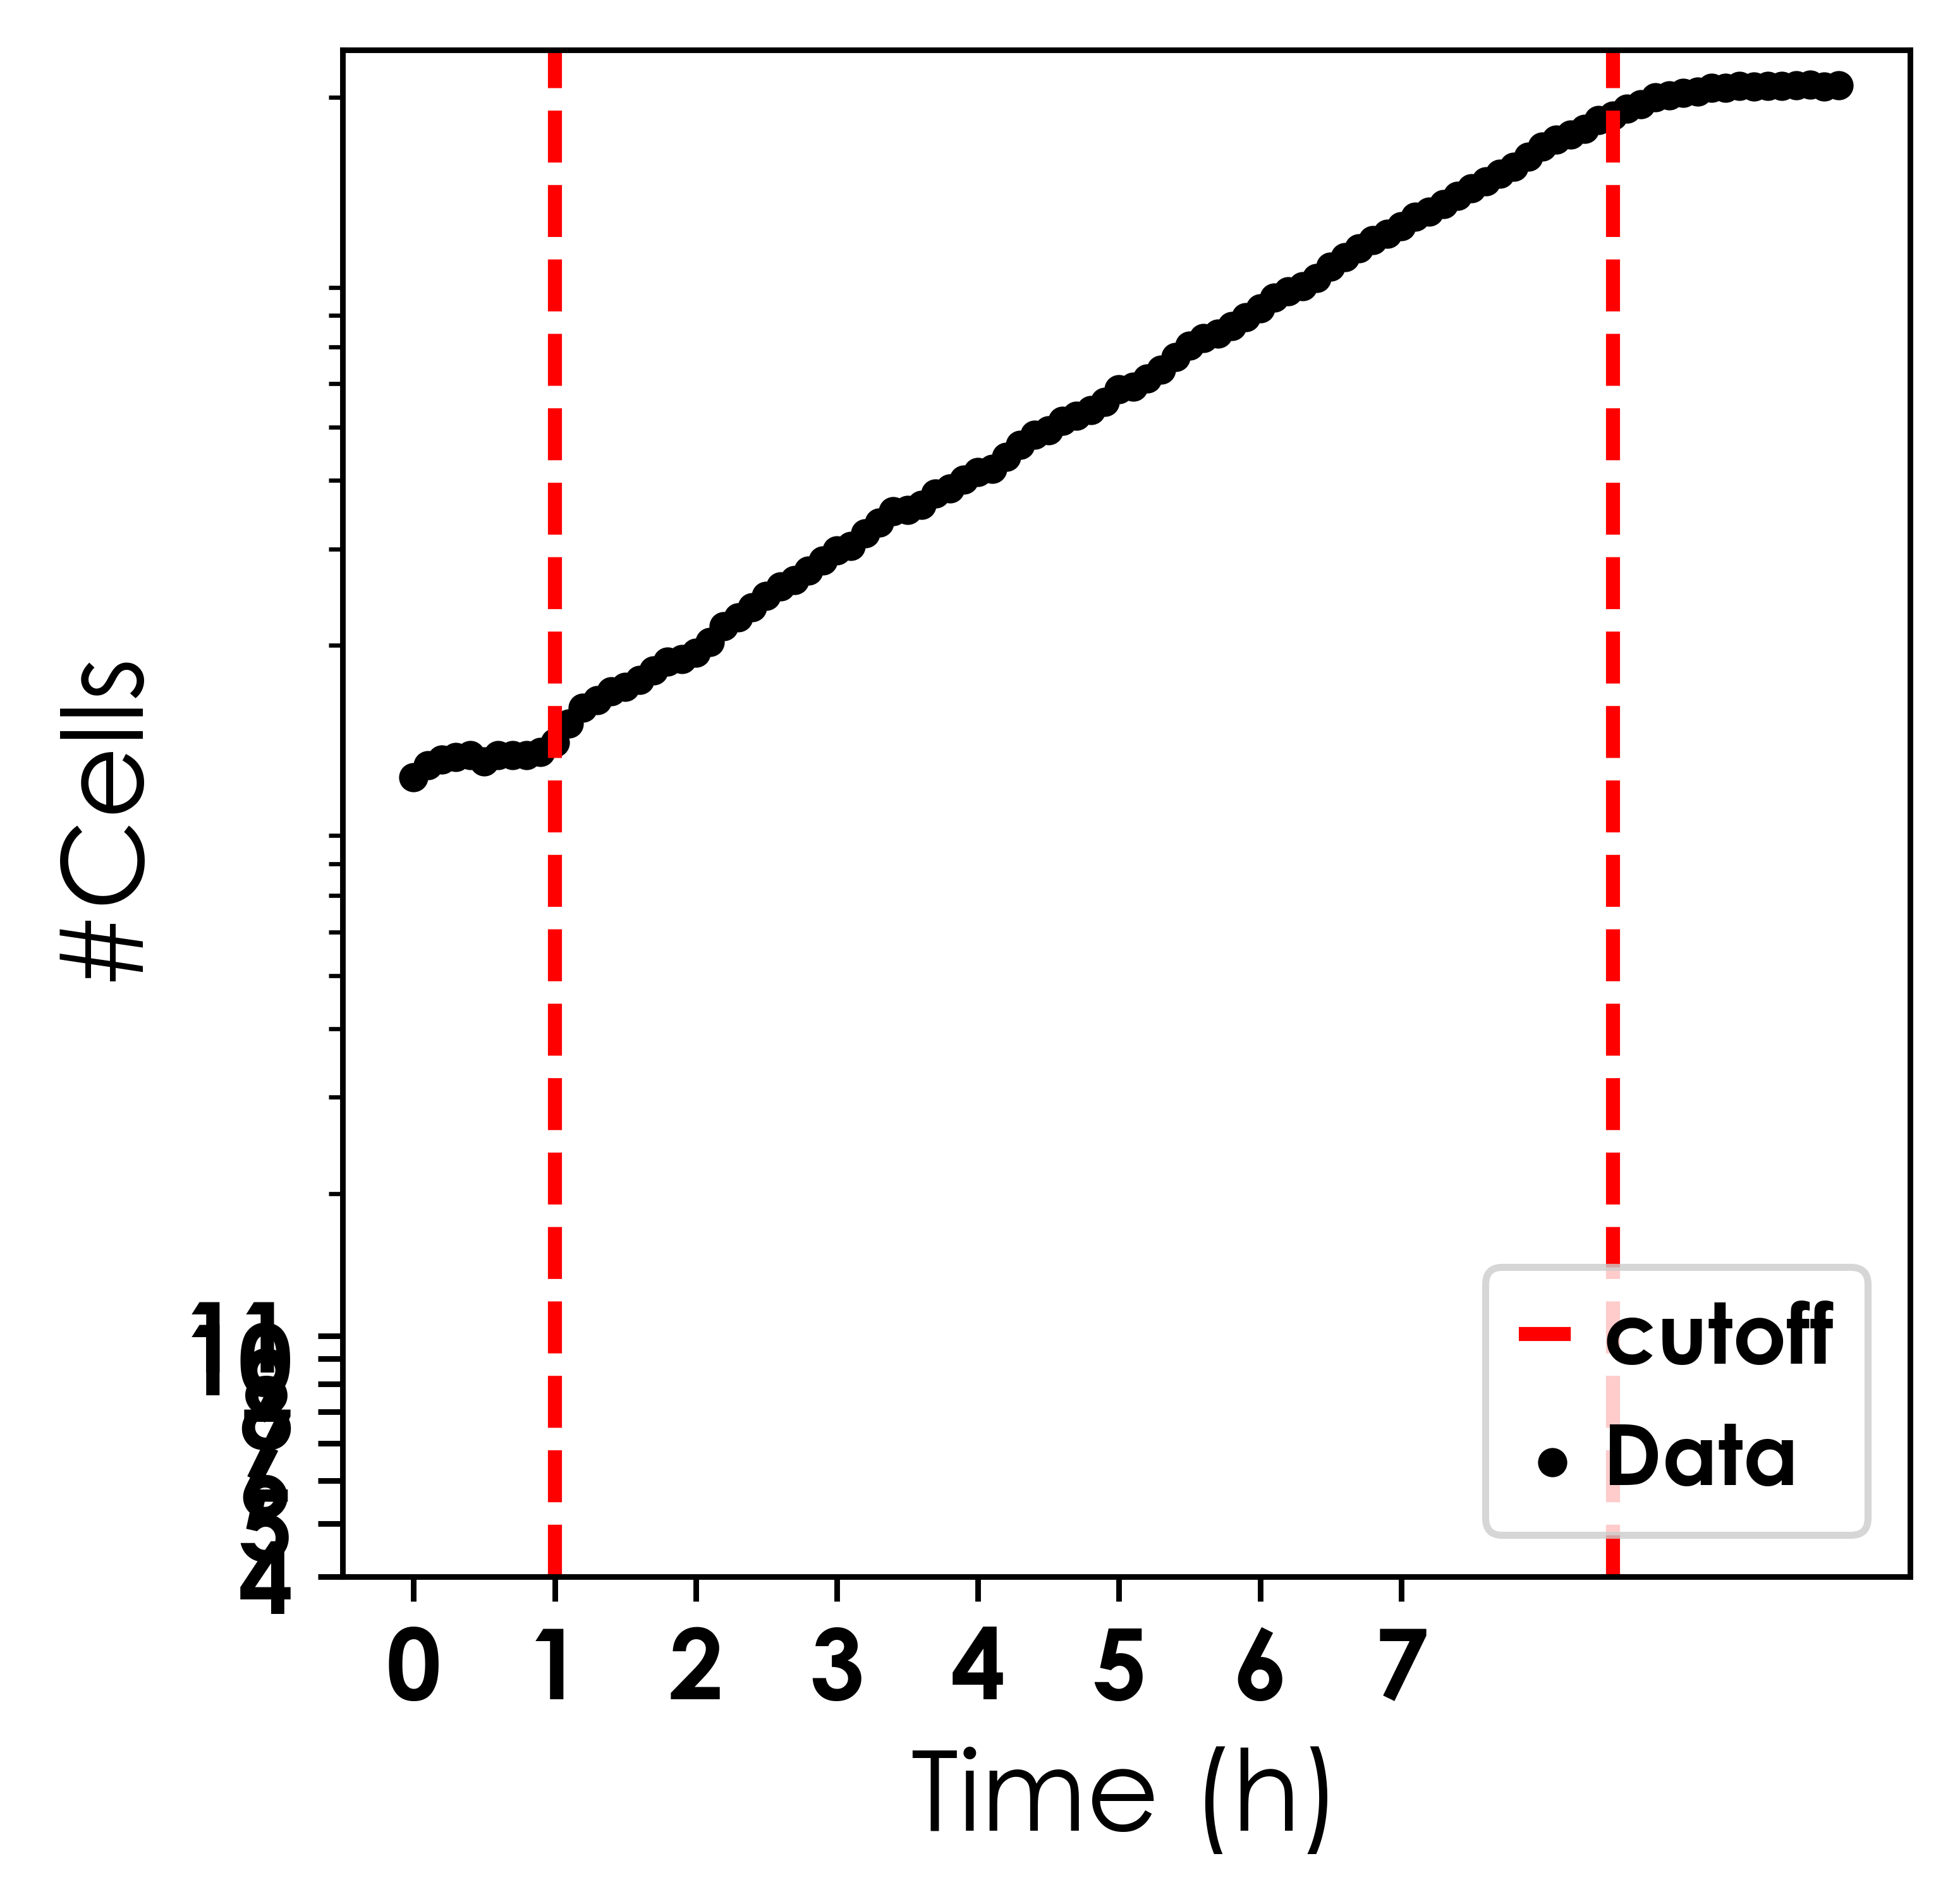

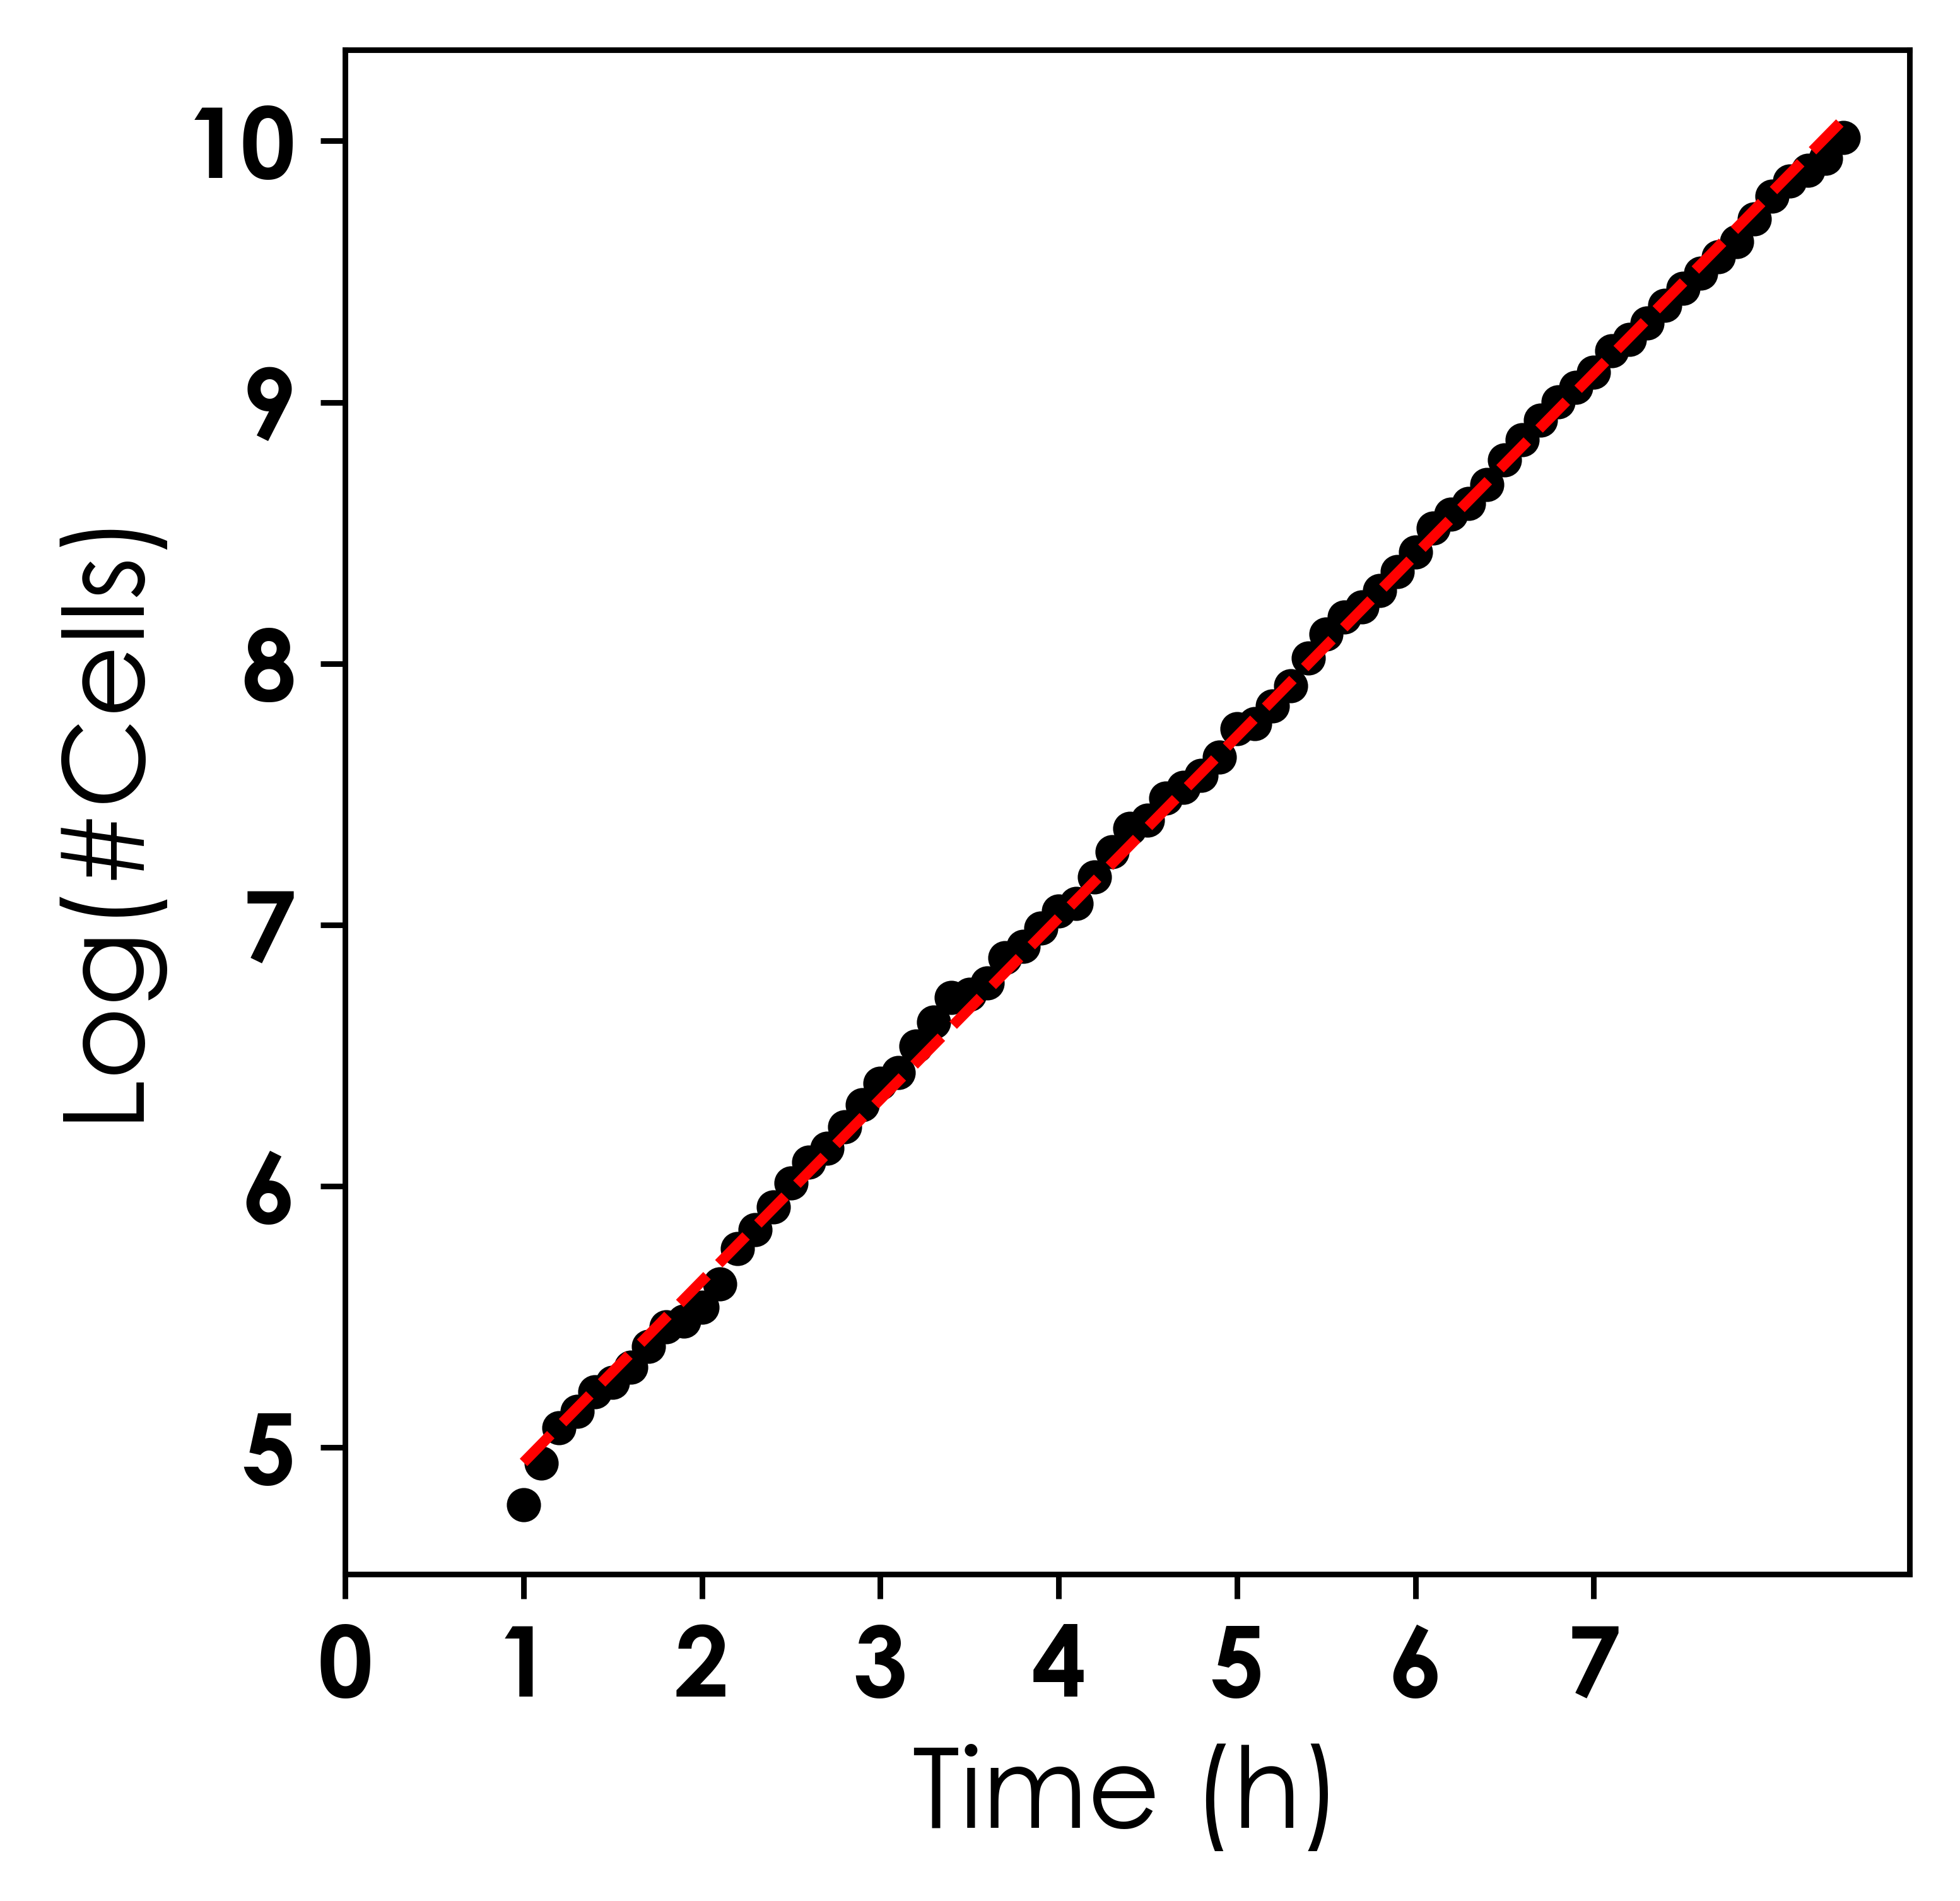

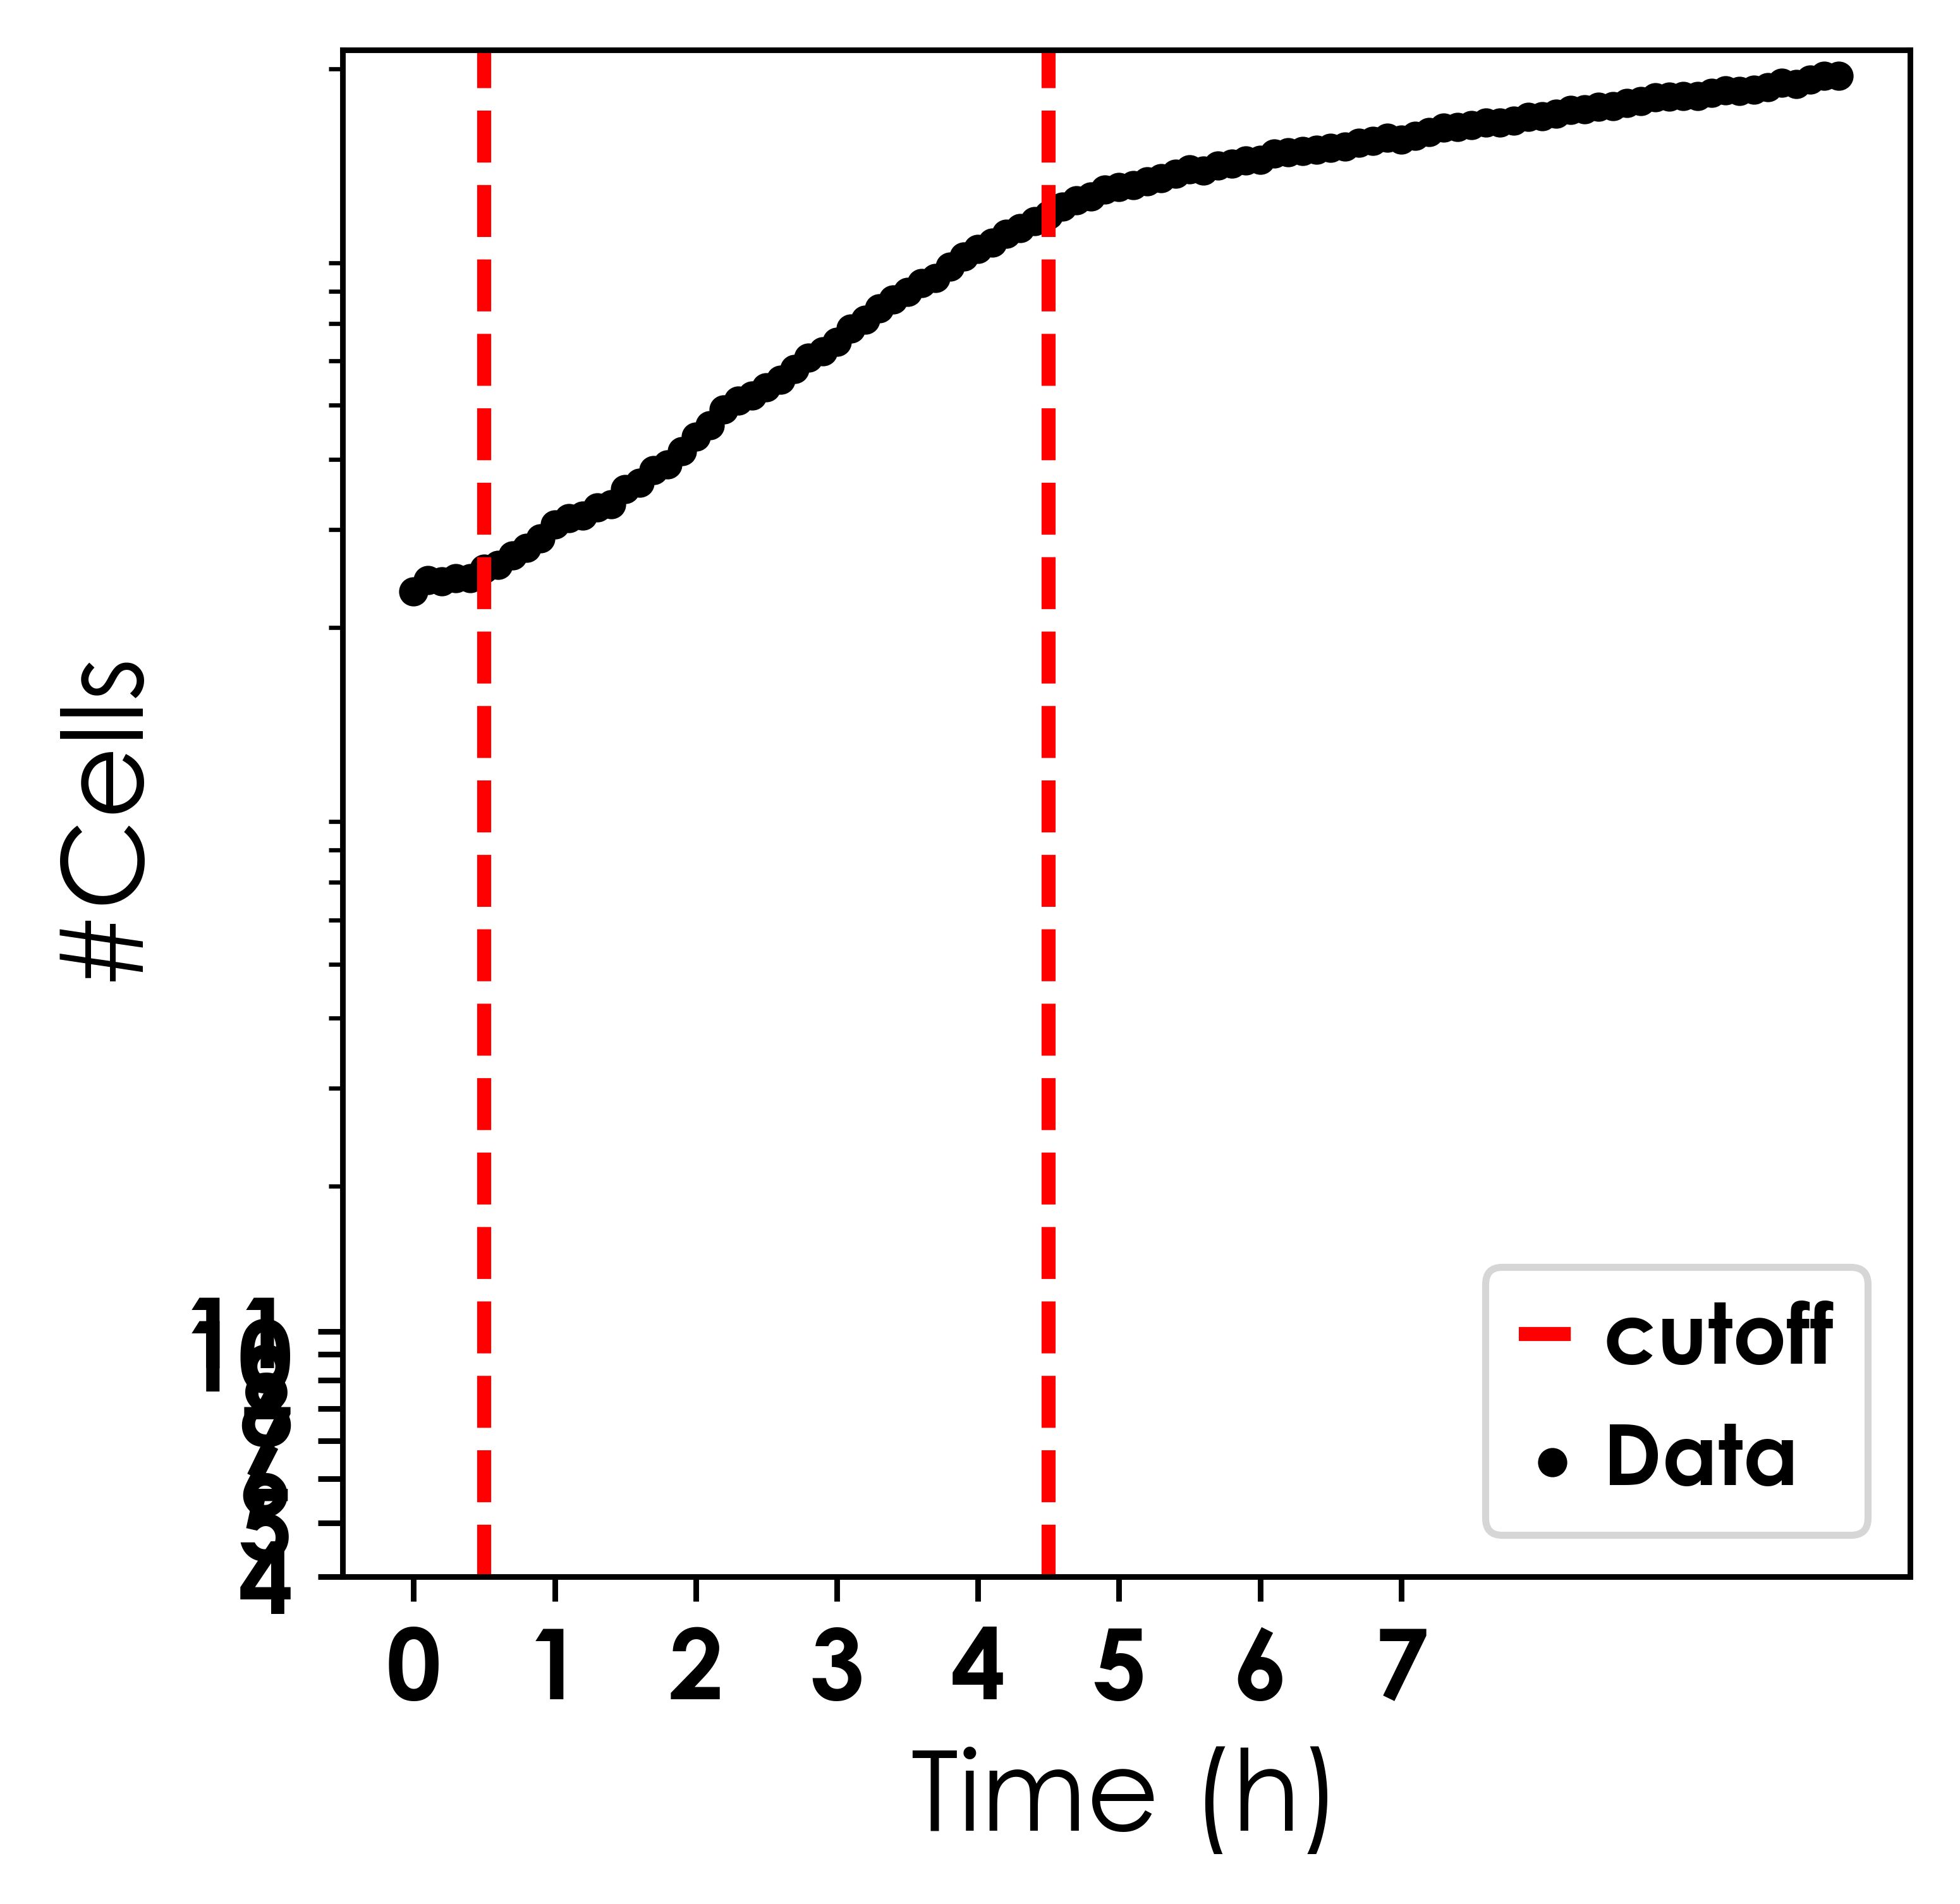

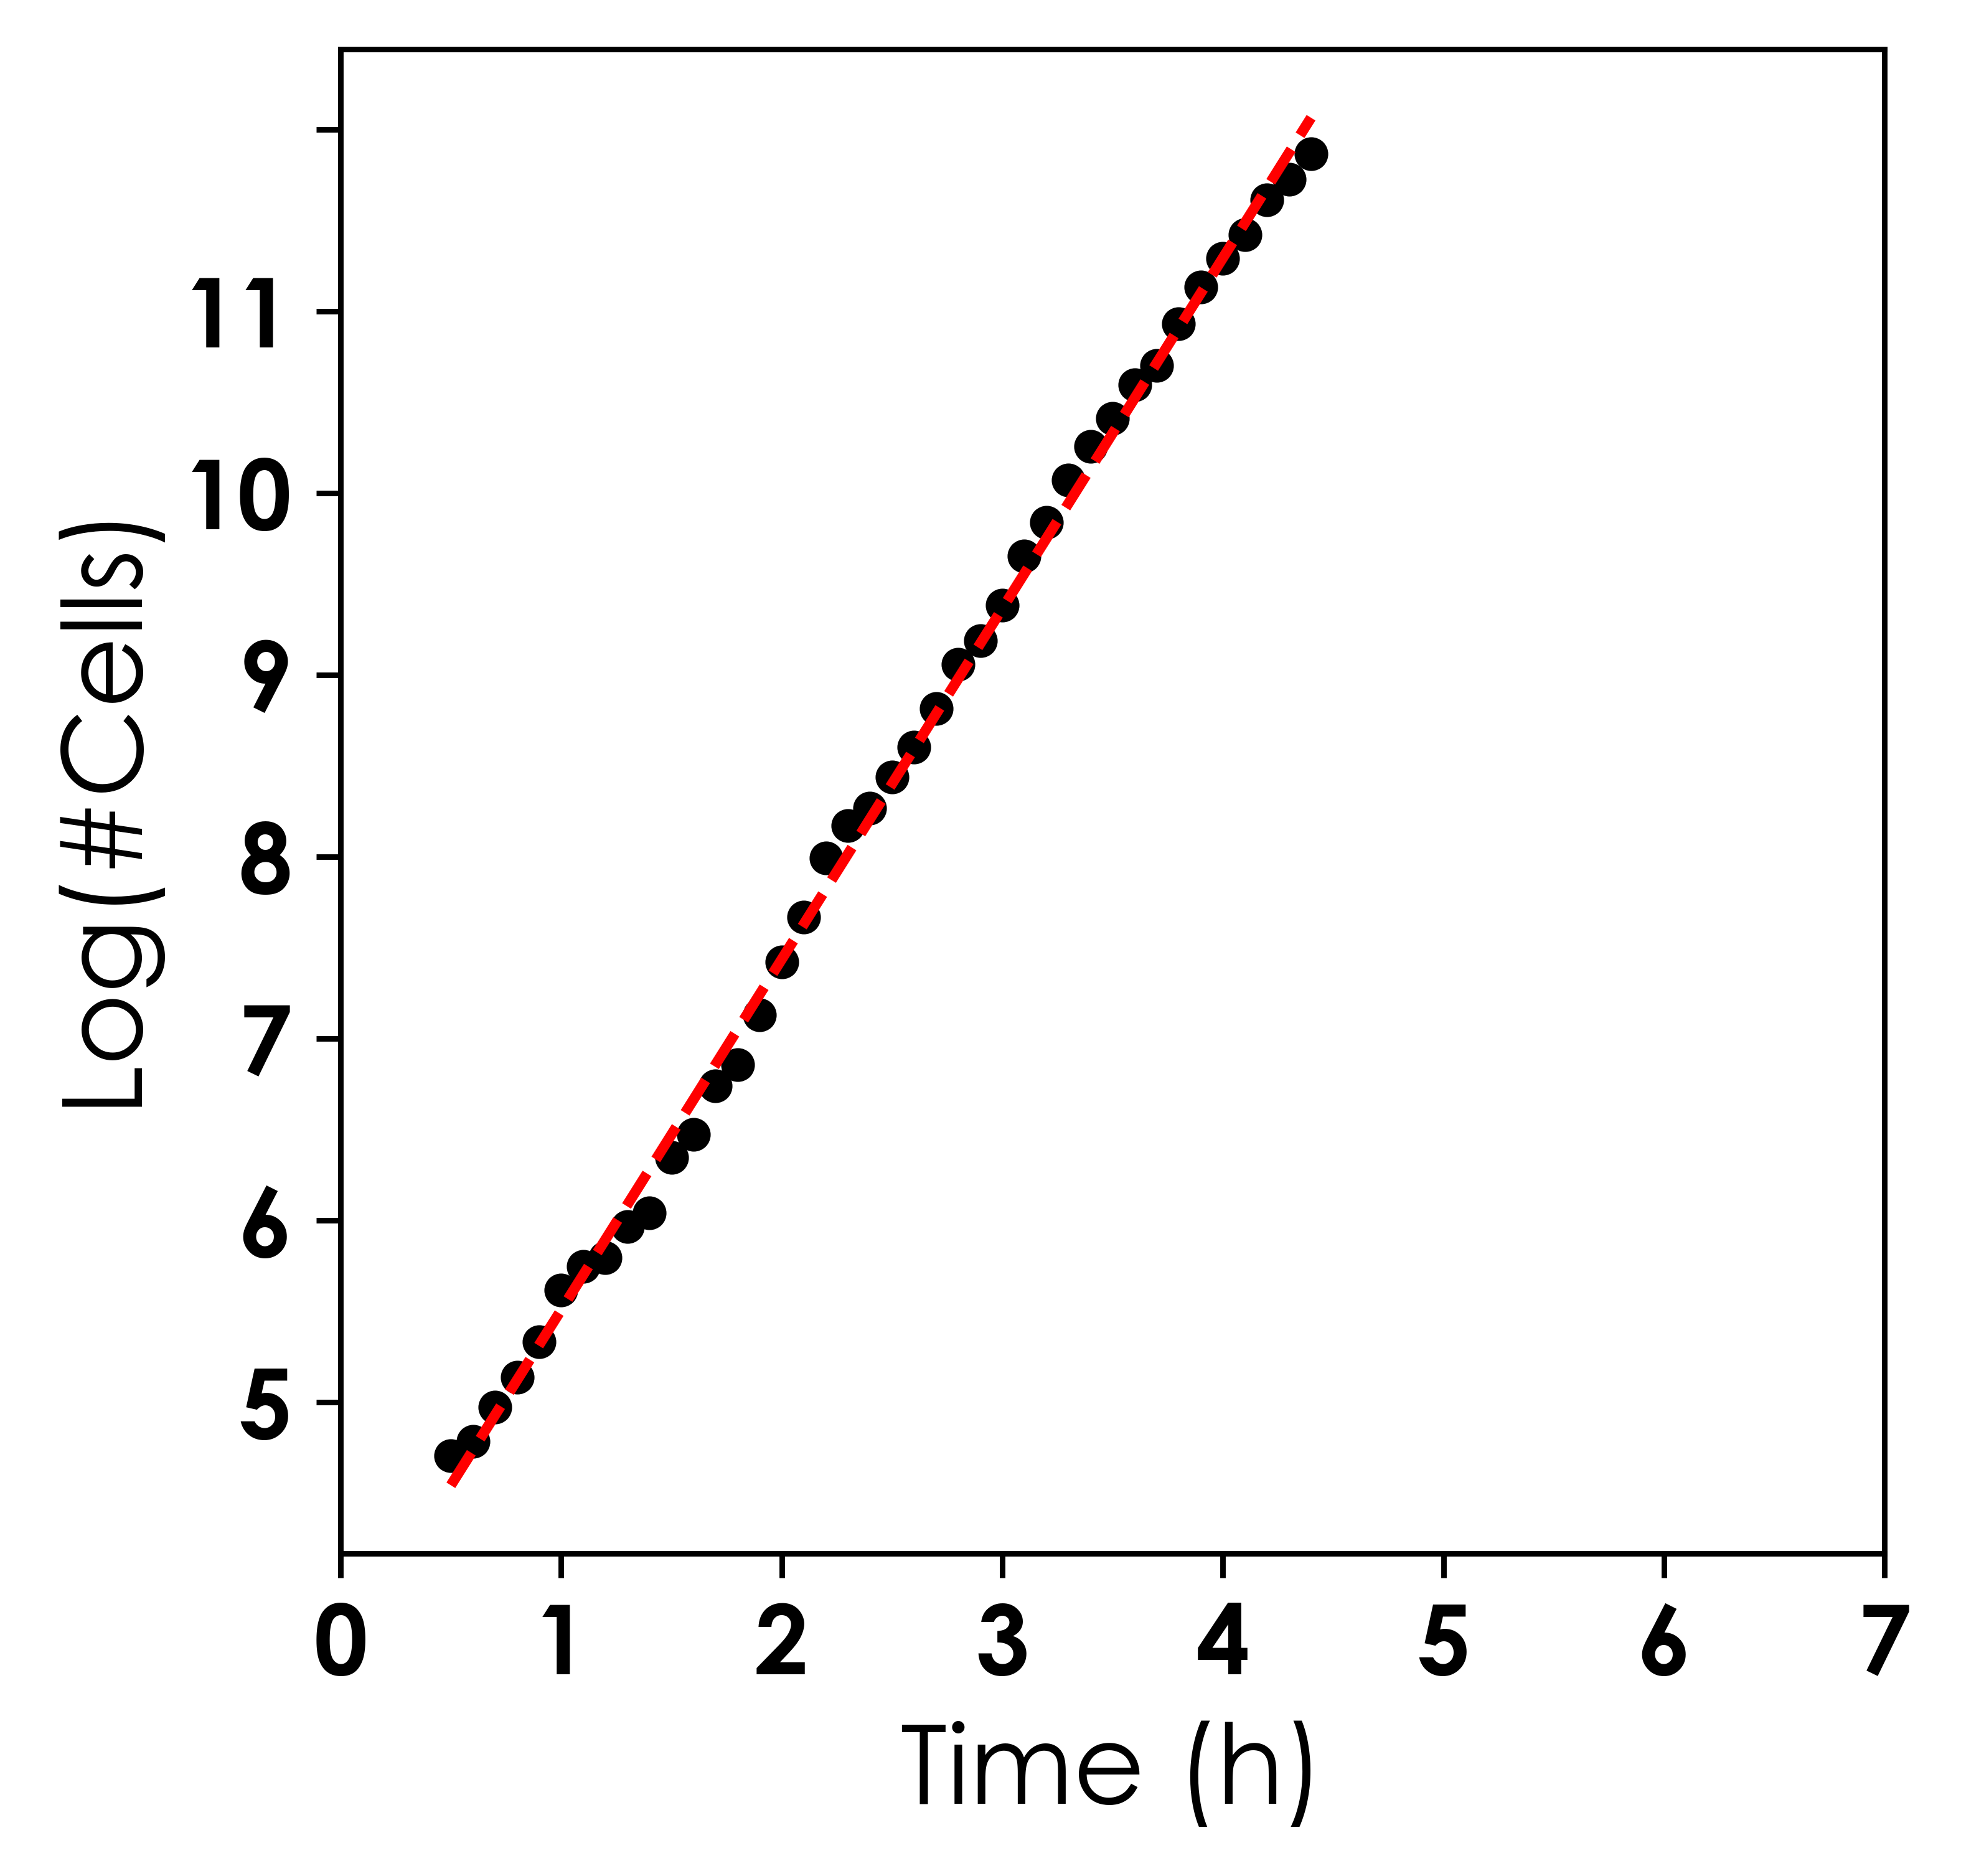

In [8]:
gg = []
pp = []
ga = []
cutoffs = [(0,70),(10,80),(10,80),(10,65),(10,85),(5,45)]
yticks = [100,200,400,600,800,1000,1500,2000]
xticks = [i for i in range(11)]

for jj,pos in enumerate(['pos0','pos1','pos2','pos3','pos4','pos5']):
    print(pos)
    print(jj)
    t,g,p,_ =rec_micro(data[pos],color = '#25cbf1',threshx =100,threshy =150,thresh_c=300,thresh_g=500,t_end = 101)
    gg.append(g)
    pp.append(p)    
    fig,ax = plt.subplots(1,1,figsize = (4,4),dpi = 800)

    ax.scatter(np.arange(len(pp[jj]))/10,pp[jj],s = 10,c ='k',label = 'Data')
    ax.set_yscale('log')
    ax.set_xlabel('Time (h)', fontsize=fs-2,**cgfont)
    ax.set_ylabel('#Cells', fontsize=fs-2,**cgfont)
    ax.axvline(x = cutoffs[jj][0]/10,c = 'r',lw = 2,ls ='--',label = 'cutoff')
    ax.axvline(x = cutoffs[jj][1]/10,c = 'r',lw = 2,ls ='--')
    ax.set_yticks(yticks)
    ax.set_yticklabels([str(i) for i in yticks], fontsize=fs-4,**cgfont)
    ax.set_xticks(xticks)
    ax.set_xticklabels([str(i) for i in xticks], fontsize=fs-4,**cgfont)
    L1 =ax.legend(ncol = 1,fontsize=fs-6,loc = 'lower right',columnspacing = 0.4,title_fontsize = fs-6,handlelength = 0.8,handletextpad = 0.2)
    plt.setp(L1.texts, **cgfont)
    L1._legend_box.align = "center" 
#     plt.savefig(path +'cellno.eps',bbox_inches='tight')
#     plt.savefig(path +'cellno.png',bbox_inches='tight')
#     plt.savefig(path +'cellno.svg',bbox_inches='tight')
#     plt.savefig(path +'FigureS2g.eps',bbox_inches='tight')
#     plt.savefig(path +'FigureS2g.png',bbox_inches='tight')
#     plt.savefig(path +'FigureS2g.svg',bbox_inches='tight')
    t= np.arange(len(pp[jj]))*6
    def objective(x,a,b,c):
        return a*x+b
    popt, _ = scipy.optimize.curve_fit(objective, t[cutoffs[jj][0]:cutoffs[jj][1]]/60, np.log(pp[jj][cutoffs[jj][0]:cutoffs[jj][1]].ravel()))
    print(popt)
    a, b, c = popt
    print(a)
    ga.append(a)
    y_new = objective(np.asarray(t[cutoffs[jj][0]:cutoffs[jj][1]]/60), a, b, c)
    fig, (ax1) = plt.subplots(1,1,figsize=(4,4), dpi=800, facecolor='w', edgecolor='k')

    ax1.scatter(np.asarray(t[cutoffs[jj][0]:cutoffs[jj][1]])/60,np.log(pp[jj][cutoffs[jj][0]:cutoffs[jj][1]]).ravel(),c ='k',s = 15, label = 'Data')
    ax1.plot(np.asarray(t[cutoffs[jj][0]:cutoffs[jj][1]])/60,y_new,'--r',label =('Fit µ = %0.2f'%a +'h$^{-1}$'))
#     ax1.set_title('Fitting upto Frame #75')
    ax1.set_xlabel('Time (h)', fontsize=fs-2,**cgfont)
    ax1.set_ylabel('Log(#Cells)', fontsize=fs-2,**cgfont)
    yticks = [4,5,6,7,8,9,10,11]
    xticks = [i for i in range(8)]
    ax1.set_yticklabels([str(i) for i in yticks], fontsize=fs-4,**cgfont)
    ax1.set_xticks(xticks)
    ax1.set_xticklabels([str(i) for i in xticks], fontsize=fs-4,**cgfont)
#     L1 =ax1.legend(ncol = 1,fontsize=fs-6,loc = 'lower right',columnspacing = 0.4,title_fontsize = fs-6,handlelength = 0.8,handletextpad = 0.2)
#     plt.setp(L1.texts, **cgfont)
#     L1._legend_box.align = "center"  

#     plt.savefig(out_path_plot +'FigureS2g.eps',bbox_inches='tight')
#     plt.savefig(out_path_plot +'FigureS2g.png',bbox_inches='tight')
#     plt.savefig(out_path_plot +'FigureS2g.svg',bbox_inches='tight')